# Laurentia Paleomagnetic Poles compilation

This Jupyter notebook develops a compilation of paleomagnetic poles for Laurentia. It is associated with the manuscript:

**The Precambrian paleogeography of Laurentia** written by Nicholas L. Swanson-Hysell for a book entitled *Ancient Supercontinents and the Paleogeography of the Earth*

 This notebook uses a Python 3 kernel called `laurentia_paleogeo` which has a set of packages defined in a .yml file within this repository. 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import NaturalEarthFeature, COLORS
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

duluth_lat = 46.8
duluth_lon = 267.9

## Import poles

### Import Leirubakki compilation

This analysis will focus on the poles rated as 'A' or 'B' by the Nordic Paleogeography working groups. The most recent updated to compiliation for Laurentia was made at the 2017 workshop in Leirubakki, Iceland.

In [3]:
Leirubakki_poles = pd.read_excel('../Data/Leirubakki_Laurentia.xlsx')
Leirubakki_poles.columns

Index([                      'Terrane',                      'ROCKNAME',
                                 -10.3,                     'COMPONENT',
                               'TESTS',                          'TILT',
                                'SLAT',                         'SLONG',
                                   'B',                             'N',
                                 'DEC',                           'INC',
                              'abs(I)',                            'KD',
                                'ED95',                          'PLAT',
                               'PLONG',                            'DP',
                                  'DM',                           'A95',
                                '%REV',                     'DEMAGCODE',
                                    40,                              24,
                                    10,                              16,
                                     2,            

## Assign Plate_ID to each pole

In [4]:
Leirubakki_poles.Terrane.unique()

array(['Laurentia-Superior(East)', 'Laurentia-Superior(West)',
       'Laurentia-Superior', 'Laurentia-Wyoming',
       'Laurentia-Trans-Hudson orogen', 'Laurentia-Rae',
       'Laurentia-Slave', 'Laurentia', 'Laurentia-Greenland',
       'Laurentia-Greenland-Nain', 'Laurentia-Scotland',
       'Laurentia-Svalbard'], dtype=object)

In [11]:
Leirubakki_poles['Plate_ID'] = pd.Series(dtype=str)

for pole in Leirubakki_poles.index:
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior(East)':
        Leirubakki_poles['Plate_ID'][pole] = 10043
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior(West)':
        Leirubakki_poles['Plate_ID'][pole] = 10023
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Superior':
        Leirubakki_poles['Plate_ID'][pole] = 10023
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Wyoming':
        Leirubakki_poles['Plate_ID'][pole] = 10049
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Trans-Hudson orogen':
        Leirubakki_poles['Plate_ID'][pole] = 101
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Rae':
        Leirubakki_poles['Plate_ID'][pole] = 10640
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Slave':
        Leirubakki_poles['Plate_ID'][pole] = 10041
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland':
        Leirubakki_poles['Plate_ID'][pole] = 10032
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland-Nain':
        Leirubakki_poles['Plate_ID'][pole] = 10032
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia':
        Leirubakki_poles['Plate_ID'][pole] = 101
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Scotland':
        Leirubakki_poles['Plate_ID'][pole] = 10258
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Svalbard':
        Leirubakki_poles['Plate_ID'][pole] = 10296

In [12]:
Leirubakki_poles.head()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
0,Laurentia-Superior(East),Otto Stock Dykes and Aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,84,330.0,71.0,71.0,139.0,3.0,69.0,227.0,4.5,5.2,4.837355,17or83,3.0,1,1,1,1,1,1,1,1,1,0,6,B,2676.0,2671,2681,"2680±1 for stock, but lamprophyre dykes are yo...",Otto Stock Dykes and Aureole,"Pullaiah,G., Irving,E.",1975,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,10043
1,Laurentia-Superior(East),PTARMIGAN MEAN,new,NaN,NaN,0.0,54.0,287.000000,3.0,18,49.6,46.1,46.1,0.1,1000.0,-45.3,213.0,13.8,13.8,13.800000,0or100,3.0,1,0,0,0,0,1,0,1,0,1,4,B,2505.0,2503,2507,"2505±2,",PTARMIGAN MEAN,"Evans,D.A.D., Halls,H.C.",2010,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
2,Laurentia-Superior(East),MATACHEWAN R,new,NaN,C+,0.0,48.0,278.000000,NaN,1000,207.6,-16.6,16.6,1000.0,0.1,-44.1,238.3,1.6,1.6,1.600000,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,2466.0,2443,2489,"two ages, both U-Pb(z)",MATACHEWAN R,"Evans,D.A.D., Halls,H.C.",2010,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
3,Laurentia-Superior(East),MATACHEWAN N,new,NaN,C+,0.0,48.0,278.000000,NaN,1000,23.3,29.1,29.1,1000.0,0.1,-52.3,239.5,2.4,2.4,2.400000,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,2446.0,2443,2449,"2446±3,",MATACHEWAN N,"Evans,D.A.D., Halls,H.C.",2010,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,10043
4,Laurentia-Superior(East),SENNETERRE,B+93,NaN,C+,0.0,49.0,283.000000,6.0,1000,358.6,-43.9,43.9,1000.0,0.1,-15.3,284.3,4.4,7.0,5.549775,MIXED,4.0,1,1,1,1,1,1,1,1,1,1,7,A,2218.0,2212,2224,"2216+8/-4,",SENNETERRE,Buchan et al.,1993,Can. J. Earth Sci.,30,1286-1296,Northeast-trending Early Proterozoic dykes of ...,NaN,\cite{Buchan1993a},NaN,changed dp/dm to match Buchan1993,10043


In [13]:
Leirubakki_poles.to_csv('../Data/Leirubakki_poles_w_PlateID.csv')

## Apply Euler rotations to poles from seperated terranes

The poles in the compilation are given relative to their local block. There are terranes with valuable constraints that were once part of Laurentia, but have since had distinct drift histories. We can apply Euler rotations associated with these separation in an effort to utilize these poles in reconstructing Laurentia's history. We use the following Euler poles:

\begin{table}[hbt]
\begin{tabular}{|l|l|l|l|p{2 in}|}
  \hline
& Euler pole & Euler pole & rotation & note and \\
Block & longitude & latitude & angle & citation \\
\hline
Greenland & -118.5 & 67.5 & -13.8 & Cenozoic separation of Greenland from Laurentia associated with opening of Baffin Bay and the Labrador Sea \citep{Roest1989} \\
\hline
Scotland & 161.9 & 78.6 & -31.0 & Reconstructing Atlantic opening following \cite{Torsvik2017a} \\
\hline
Svalbard & 125.0 & -81.0 & 68 & Rotate Svalbard to Laurentia in fit that works well with East Greenland basin according to \cite{Maloof2006a}\\
\hline
\end{tabular}
\caption{}
\end{table}

In [4]:
Greenland_Euler = [67.5,-118.5,-13.8] #[lat,lon,CCW angle]
Scotland_Euler = [78.6,161.9,-31.0]
Svalbard_Euler = [-81.0,125.0,68.0]

Let's make sure that the rotations are working as expected by:
- rotating Edinburgh (55.9533° N, 3.1883° W) back to Laurentia.
- Nuuk (64.1814° N, 51.6941° W) back to Laurentia
- Longyearbyen (78.2232° N, 15.6267° E) back to Laurentia

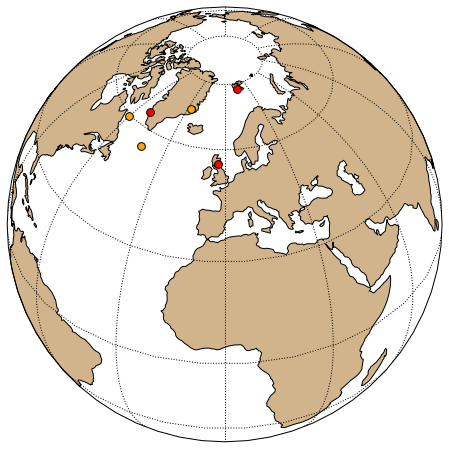

In [5]:
Edinburgh_lat = 55.95
Edinburgh_lon = -3.19
Edinburgh_recon = pmag.pt_rot(Scotland_Euler,[Edinburgh_lat],[Edinburgh_lon])
Edinburgh_recon_lat = Edinburgh_recon[0][0]
Edinburgh_recon_lon = Edinburgh_recon[1][0]

Nuuk_lat = 64.1814
Nuuk_lon = -51.6941
Nuuk_recon = pmag.pt_rot(Greenland_Euler,[Nuuk_lat],[Nuuk_lon])
Nuuk_recon_lat = Nuuk_recon[0][0]
Nuuk_recon_lon = Nuuk_recon[1][0]

Longyearbyen_lat = 78.2232
Longyearbyen_lon = 15.6267
Longyearbyen_recon = pmag.pt_rot(Svalbard_Euler,[Longyearbyen_lat],[Longyearbyen_lon])
Longyearbyen_recon_lat = Longyearbyen_recon[0][0]
Longyearbyen_recon_lon = Longyearbyen_recon[1][0]

m = ipmag.make_orthographic_map(central_latitude=40)
ipmag.plot_vgp(m,Edinburgh_lon,Edinburgh_lat, color='red',markersize=60)
ipmag.plot_vgp(m,Edinburgh_recon_lon,Edinburgh_recon_lat, color='orange',markersize=60)
ipmag.plot_vgp(m,Nuuk_lon,Nuuk_lat, color='red',markersize=60)
ipmag.plot_vgp(m,Nuuk_recon_lon,Nuuk_recon_lat, color='orange',markersize=60)
ipmag.plot_vgp(m,Longyearbyen_lon,Longyearbyen_lat, color='red',markersize=60)
ipmag.plot_vgp(m,Longyearbyen_recon_lon,Longyearbyen_recon_lat, color='orange',markersize=60)

In [6]:
Leirubakki_poles['Laurentia_plon'] = pd.Series()
Leirubakki_poles['Laurentia_plat'] = pd.Series()

for pole in Leirubakki_poles.index:
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Scotland':
        plat, plon = pmag.pt_rot(Scotland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland':
        plat, plon = pmag.pt_rot(Greenland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Greenland-Nain':
        plat, plon = pmag.pt_rot(Greenland_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia-Svalbard':
        plat, plon = pmag.pt_rot(Svalbard_Euler,[Leirubakki_poles['PLAT'][pole]],[Leirubakki_poles['PLONG'][pole]])
        Leirubakki_poles['Laurentia_plat'][pole] = plat[0]
        Leirubakki_poles['Laurentia_plon'][pole] = plon[0]
    if Leirubakki_poles['Terrane'][pole] == 'Laurentia':
        Leirubakki_poles['Laurentia_plat'][pole] = Leirubakki_poles['PLAT'][pole]
        Leirubakki_poles['Laurentia_plon'][pole] = Leirubakki_poles['PLONG'][pole]

In [7]:
Leirubakki_poles.head()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Laurentia_plon,Laurentia_plat
0,Laurentia-Superior(East),Otto Stock Dykes and Aureole,2629,N+R Component,"C*+,R-",0.0,48.0,279.900002,18.0,84,330.0,71.0,71.0,139.0,3.0,69.0,227.0,4.5,5.2,4.837355,17or83,3.0,1,1,1,1,1,1,1,1,1,0,6,B,2676.0,2671,2681,"2680±1 for stock, but lamprophyre dykes are yo...",Otto Stock Dykes and Aureole,"Pullaiah,G., Irving,E.",1975,Canad.J.Earth Sci.,12,1609-1618,Paleomagnetism of the contact aureole and late...,Overlaps with Cenozoic,\cite{Pullaiah1975b},NaN,NaN,NaN,NaN
1,Laurentia-Superior(East),PTARMIGAN MEAN,new,NaN,NaN,0.0,54.0,287.000000,3.0,18,49.6,46.1,46.1,0.1,1000.0,-45.3,213.0,13.8,13.8,13.800000,0or100,3.0,1,0,0,0,0,1,0,1,0,1,4,B,2505.0,2503,2507,"2505±2,",PTARMIGAN MEAN,"Evans,D.A.D., Halls,H.C.",2010,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,NaN,NaN
2,Laurentia-Superior(East),MATACHEWAN R,new,NaN,C+,0.0,48.0,278.000000,NaN,1000,207.6,-16.6,16.6,1000.0,0.1,-44.1,238.3,1.6,1.6,1.600000,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,2466.0,2443,2489,"two ages, both U-Pb(z)",MATACHEWAN R,"Evans,D.A.D., Halls,H.C.",2010,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,NaN,NaN
3,Laurentia-Superior(East),MATACHEWAN N,new,NaN,C+,0.0,48.0,278.000000,NaN,1000,23.3,29.1,29.1,1000.0,0.1,-52.3,239.5,2.4,2.4,2.400000,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,2446.0,2443,2449,"2446±3,",MATACHEWAN N,"Evans,D.A.D., Halls,H.C.",2010,Precambrian Res.,183,474-489,Restoring Proterozoic deformation within the S...,NaN,\cite{Evans2010a},NaN,NaN,NaN,NaN
4,Laurentia-Superior(East),SENNETERRE,B+93,NaN,C+,0.0,49.0,283.000000,6.0,1000,358.6,-43.9,43.9,1000.0,0.1,-15.3,284.3,4.4,7.0,5.549775,MIXED,4.0,1,1,1,1,1,1,1,1,1,1,7,A,2218.0,2212,2224,"2216+8/-4,",SENNETERRE,Buchan et al.,1993,Can. J. Earth Sci.,30,1286-1296,Northeast-trending Early Proterozoic dykes of ...,NaN,\cite{Buchan1993a},NaN,changed dp/dm to match Buchan1993,NaN,NaN


## Calculating age uncertainities

For plotting purposes, it is useful to have the age uncertainty be expressed as the uncertainty magnitude rather than the low and high age. These numbers are calculated through calculating the difference relative to the nominal age in the cell below. In addition, a new age column is generated that gives the nominal age as well as the + and - associated with that age rounded to the nearest integer (half up rounding is implemented via a function).

In [8]:
Leirubakki_poles['nominal age'][98]

830.5

In [9]:
import math

def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

int(round_half_up(Leirubakki_poles['nominal age'][98]))

831

In [10]:
Leirubakki_poles['age_error_high'] = pd.Series()
Leirubakki_poles['age_error_low'] = pd.Series()
Leirubakki_poles['age'] = pd.Series()

for pole in Leirubakki_poles.index:
    pole_age_error_high = Leirubakki_poles['himagage'][pole]-Leirubakki_poles['nominal age'][pole]
    Leirubakki_poles['age_error_high'][pole] = pole_age_error_high
    
    pole_age_error_low = Leirubakki_poles['nominal age'][pole]-Leirubakki_poles['lomagage'][pole]
    Leirubakki_poles['age_error_low'][pole] = pole_age_error_low
    
    Leirubakki_poles['age'][pole] = str(int(round_half_up(Leirubakki_poles['nominal age'][pole])))+'$^{+'+str(int(round_half_up(pole_age_error_high)))+'}$'+'$_{-'+str(int(round_half_up(pole_age_error_low)))+'}$'
    
Leirubakki_poles.tail()

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Laurentia_plon,Laurentia_plat,age_error_high,age_error_low,age
96,Laurentia-Scotland,MEAN Stoer Group,NEW,"sample-weighted mean of (Stewart+Irving 74, Sm...",many,100.0,58.0,354.5,NaN,610,310.8,34.7,34.7,1000.0,0.1,37.2,238.4,7.7,7.7,7.700000,MIXED,4.0,0,1,1,1,1,1,1,1,1,0,5,B,1199.0,1129,1269,"1199±70,",MEAN Stoer Group,LULEÅ WORKING GROUP MEAN,2009,NaN,NaN,NaN,NaN,Overlaps with Keweenawan Track,NaN,NaN,NaN,209.923421,31.838329,70.0,70.0,1199$^{+70}$$_{-70}$
97,Laurentia-Scotland,MEAN Torridon Group,NEW,"sample-weighted mean of (Irving+Runcorn 57, St...",many,100.0,57.9,354.3,NaN,880,119.6,56.7,56.7,1000.0,0.1,-17.7,220.9,7.1,7.1,7.100000,MIXED,4.0,0,1,1,1,1,1,1,1,1,0,5,B,925.0,780,1070,NaN,MEAN Torridon Group,LULEÅ WORKING GROUP MEAN,2009,NaN,NaN,NaN,NaN,Overlaps with Long Range Dikes,NaN,NaN,NaN,188.889808,-21.832061,145.0,145.0,925$^{+145}$$_{-145}$
98,Laurentia-Svalbard,Lower Grusdievbreen Formation,new,NaN,Fo,100.0,79.0,18.0,4.0,53,354.4,16.1,16.1,39.9,14.7,19.6,204.9,7.8,15.1,10.852649,MIXED,4.0,1,1,1,1,1,1,0,0,1,1,5,B,830.5,811,850,"pre-Bitter Springs, authors",Lower Grusdievbreen Formation,"Maloof,A.C., Halverson,G.P., Kirschvink,J.L., ...",2006,Geol.Soc.Am.Bulletin,118,1099-1124,"Combined paleomagnetic, isotopic, and stratigr...",NaN,NaN,NaN,NaN,134.500091,26.671588,19.5,19.5,831$^{+20}$$_{-20}$
99,Laurentia-Svalbard,Upper Grusdievbreen Formation,new,NaN,Fo,100.0,78.9,18.2,5.0,107,126.3,14.7,14.7,84.2,8.4,-1.1,252.6,4.4,8.6,6.151423,MIXED,4.0,1,1,1,1,1,1,0,0,1,1,5,B,800.0,789,811,"789-811, authors",Upper Grusdievbreen Formation,"Maloof,A.C., Halverson,G.P., Kirschvink,J.L., ...",2006,Geol.Soc.Am.Bulletin,118,1099-1124,"Combined paleomagnetic, isotopic, and stratigr...",NaN,NaN,NaN,NaN,185.303922,8.913216,11.0,11.0,800$^{+11}$$_{-11}$
100,Laurentia-Svalbard,Svanbergfjellet Formation,new,NaN,F*+,100.0,78.5,18.0,1.0,18,333.2,29.4,29.4,25.2,7.0,25.9,226.8,4.3,7.7,5.754129,0or100,4.0,1,0,1,1,0,1,1,0,0,1,4,B,759.5,730,789,"pre-Islay anomaly, post BS, authors",Svanbergfjellet Formation,"Maloof,A.C., Halverson,G.P., Kirschvink,J.L., ...",2006,Geol.Soc.Am.Bulletin,118,1099-1124,"Combined paleomagnetic, isotopic, and stratigr...",NaN,NaN,NaN,NaN,157.135350,35.142357,29.5,29.5,760$^{+30}$$_{-30}$


## Calculating paleolatitude

For summary purposes, it will be useful to calculate the paleolatitude for a reference point that is relative central within Laurentia (Duluth, Minnesota) implied by each of the poles (note that this approach isn't appropriate for cratons other than the West Superior craton prior to Laurentia amalgmation). We can use the ```ipmag.lat_from_pole``` function to do so.

In [11]:
Leirubakki_poles['Duluth_plat'] = pd.Series()

for pole in Leirubakki_poles.index:
    if np.isnan(Leirubakki_poles['Laurentia_plat'][pole]) != True:
        plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
                                   Leirubakki_poles['Laurentia_plon'][pole],
                                   Leirubakki_poles['Laurentia_plat'][pole])
        Leirubakki_poles['Duluth_plat'][pole] = plat
    else:
        plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,Leirubakki_poles.PLONG[pole],Leirubakki_poles.PLAT[pole])
        Leirubakki_poles['Duluth_plat'][pole] = plat

In [12]:
poles_A = Leirubakki_poles[Leirubakki_poles['Grade']=='A']
poles_B = Leirubakki_poles[Leirubakki_poles['Grade']=='B']

## Import paleomagia database poles

Additional poles not in this curated compilation are compiled within the Paleomagia database and are imported below.

In [13]:
paleomagia_all = pd.read_csv('Data/paleomagia_2_08_2018-10-24.csv',delimiter=';')
paleomagia_Laurentia = pd.read_csv('Data/list_2019-03-17_01-51.csv')
paleomagia_all.columns

Index(['RES#', 'ROCK', 'ROCKUNIT', 'CNTRY', 'COMP', 'CRAT', 'SLAT', 'SLON',
       'LMA', 'HMA', 'ISOAGE', 'AGEREF', 'AGEREF2', 'MET', 'AGE', 'B', 'N',
       'P', 'R%', 'D', 'I', 'alfa95', 'k', 'PLAT', 'PLON', 'DP', 'DM', 'A95',
       '1', '2', '3', '4', '5', '6', 'PMAGREF', 'COMMENT', 'RECALC'],
      dtype='object')

In [14]:
list_of_cratons = ['Laurentia-Grenville', 'Laurentia-Hearne','Laurentia-Mackenzie',
                   'Laurentia-Nain', 'Laurentia-Rae','Laurentia-Slave',
                   'Laurentia-Superior', 'Laurentia-Transhudson','Laurentia-Wyoming',
                   'Laurentia-Yavapai','Greenland', 'Greenland / Gardar',
                   'Greenland / Nagssugtoqidian','Hearne','Rae','Scotland','Slave',
                   'Superior','Superior-Kapuskasing', 'Superior-east', 'Superior-west',
                   'Svalbard', 'Transhudson','Wyoming']

#Need to filter out poles that are also in Leirubakki_poles
paleomagia_poles = paleomagia_all[paleomagia_all['CRAT'].isin(list_of_cratons)]
paleomagia_poles = paleomagia_poles[paleomagia_poles['AGE'] > 542]
paleomagia_poles.head(2)

,RES#,ROCK,ROCKUNIT,CNTRY,COMP,CRAT,SLAT,SLON,LMA,HMA,ISOAGE,AGEREF,AGEREF2,MET,AGE,B,N,P,R%,D,I,alfa95,k,PLAT,PLON,DP,DM,A95,1,2,3,4,5,6,PMAGREF,COMMENT,RECALC
2,14,s,"Seton formation, Kahochella group",CA,HT,Slave,62.0,247.9,1880,1890,1885 ± 5,Davis and Bleeker (2007),NaN,corr.,1885,19,154,N,0,159.0,46.0,7.0,24.0,2.0,267.0,5.7,8.9,7.2,1,1,1,0,1,0,Irving and McGlynn (1979),Age by correlation with Ghost dykes (ca. 1885 ...,0
3,15,s,"Seton formation, Kahochella group",CA,B,Laurentia-Slave,62.0,247.9,1700,1800,NaN,APWP,NaN,"a, m",1750,14,99,N,0,158.0,68.0,7.0,36.0,25.0,263.0,9.9,11.7,10.8,0,1,1,0,1,0,Irving and McGlynn (1979),Sec. magn. acquired during uplift after deep b...,0


In [15]:
list_of_autochthonous_cratons = ['Laurentia-Grenville', 'Laurentia-Hearne','Laurentia-Mackenzie',
                   'Laurentia-Nain', 'Laurentia-Rae','Laurentia-Slave',
                   'Laurentia-Superior', 'Laurentia-Transhudson','Laurentia-Wyoming',
                   'Laurentia-Yavapai','Hearne','Rae','Slave',
                   'Superior','Superior-Kapuskasing', 'Superior-east', 'Superior-west',
                   'Transhudson','Wyoming']

paleomagia_Laurentia = paleomagia_all[(paleomagia_all['CRAT'].isin(list_of_autochthonous_cratons)) & (paleomagia_all['AGE'] < 1800)]
paleomagia_Laurentia.head()

,RES#,ROCK,ROCKUNIT,CNTRY,COMP,CRAT,SLAT,SLON,LMA,HMA,ISOAGE,AGEREF,AGEREF2,MET,AGE,B,N,P,R%,D,I,alfa95,k,PLAT,PLON,DP,DM,A95,1,2,3,4,5,6,PMAGREF,COMMENT,RECALC
3,15,s,"Seton formation, Kahochella group",CA,B,Laurentia-Slave,62.0,247.9,1700,1800,NaN,APWP,NaN,"a, m",1750,14,99,N,0,158.0,68.0,7.0,36.0,25.0,263.0,9.9,11.7,10.8,0,1,1,0,1,0,Irving and McGlynn (1979),Sec. magn. acquired during uplift after deep b...,0
5,17,s,"Douglas Peninsula formation, Pethei group",CA,LT,Laurentia-Slave,62.8,249.7,1220,1320,NaN,APWP,NaN,"a, m",1270,10,54,N,0,233.0,41.0,4.0,125.0,6.0,202.0,3.0,4.9,3.8,0,1,1,0,1,0,Irving and McGlynn (1979),Sec. magn. probably from the intrusion of Mack...,0
37,117,i,Texas granites -R,US,NaN,Laurentia-Yavapai,39.2,264.2,1327,1351,1339 ± 12,GPMDB 4.6,NaN,g,1339,1,7*,R,100,249.6,49.0,11.3,51.4,4.5,209.9,9.9,14.9,12.1,1,0,1,0,0,0,Kodama (1984),NaN,0
38,118,i,Texas granites -N,US,NaN,Laurentia-Yavapai,38.5,265.0,1355,1367,1361 ± 6,GPMDB 4.6,NaN,g,1361,1,9*,N,0,44.8,-31.9,9.5,24.3,-20.2,219.3,6.0,10.7,8.0,1,0,1,0,0,0,Kodama (1984),NaN,0
40,130,i,Cordova gabbro A -C,CA,A,Laurentia-Grenville,44.5,282.2,850,950,1150-1200,GPMDB 4.6,NaN,"a, d",900,18,49,C,78,294.0,-55.5,5.5,42.0,-10.5,151.0,6.0,8.0,6.9,0,1,1,0,0,1,Dunlop and Stirling (1985),Secondary TRM acquired in brief thermal pulse ...,0


In [16]:
paleomagia_Laurentia['age_error_high'] = pd.Series()
paleomagia_Laurentia['age_error_low'] = pd.Series()

for pole in paleomagia_Laurentia.index:
    pole_age_error_high = paleomagia_Laurentia['HMA'][pole]-paleomagia_Laurentia['AGE'][pole]
    paleomagia_Laurentia['age_error_high'][pole] = pole_age_error_high
    
    pole_age_error_low = paleomagia_Laurentia['AGE'][pole]-paleomagia_Laurentia['LMA'][pole]
    paleomagia_Laurentia['age_error_low'][pole] = pole_age_error_low
    
paleomagia_Laurentia.tail()

,RES#,ROCK,ROCKUNIT,CNTRY,COMP,CRAT,SLAT,SLON,LMA,HMA,ISOAGE,AGEREF,AGEREF2,MET,AGE,B,N,P,R%,D,I,alfa95,k,PLAT,PLON,DP,DM,A95,1,2,3,4,5,6,PMAGREF,COMMENT,RECALC,age_error_high,age_error_low
3584,1000322,s,Uinta Mountain group -R,US,NaN,Laurentia-Wyoming,40.7,250.6,750,850,NaN,APWP,NaN,"a, m",800,4,40,R,100,92.6,-7.7,9.2,101.0,4.5,161.9,4.7,9.3,6.6,0,1,1,0,1,1,Weil et al. (2006),NaN,0,50.0,50.0
3599,1002951,m,Sharbot metamorphics A -R,CA,A,Laurentia-Grenville,44.2,283.3,880,1080,NaN,Brett and Dunlop (2008),NaN,"c, g",980,3,24,R,100,283.0,-49.0,18.0,46.0,-12.0,163.0,15.7,23.8,19.3,0,0,1,0,0,1,Brett and Dunlop (2008),NaN,0,100.0,100.0
3600,1002952,m,Sharbot metamorphics A -C,CA,A,Laurentia-Grenville,44.5,283.4,880,1080,NaN,Brett and Dunlop (2008),NaN,"c, g",980,9,104,C,23,92.5,54.7,10.1,27.0,-22.2,165.3,10.1,14.3,12.0,0,1,1,0,0,1,Brett and Dunlop (2008),NaN,0,100.0,100.0
3601,1003291,m,Mazinaw metamorphics A -R,CA,A,Laurentia-Grenville,45.2,282.1,880,1080,930,Brett and Dunlop (2008),NaN,"c, g",980,5,56,R,100,288.0,-60.7,22.0,13.1,-18.7,146.5,25.6,33.5,29.3,0,0,1,0,0,1,Brett and Dunlop (2008),Recalculated from data in Table 1.,1,100.0,100.0
3602,1003292,m,Mazinaw metamorphics A -C,CA,A,Laurentia-Grenville,44.7,282.6,880,1080,930,Brett and Dunlop (2008),NaN,"c, g",980,9,97,C,58,270.5,-57.4,14.5,13.6,-25.3,161.3,15.5,21.2,18.1,0,1,1,0,0,1,Brett and Dunlop (2008),Recalculated from data in Table 1.,1,100.0,100.0


In [17]:
paleomagia_Laurentia['Duluth_plat'] = pd.Series()

for pole in paleomagia_Laurentia.index:
        plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
                                   paleomagia_Laurentia['PLON'][pole],
                                   paleomagia_Laurentia['PLAT'][pole])
        paleomagia_Laurentia['Duluth_plat'][pole] = plat

## Export the Leirubakki table for the chapter

After this table is exported, some edits need to be made and saved as pole_table_editted.tex:

```
- replace \$\textasciicircum \{ with $^{
- replace \}\$\$\_\{ with }_{
- replace \}\$ with }$
- replace A\$\_\{95}$ with A$_{95}$
- replace \\ with  \\ \hline
```

In [18]:
Laurentia_pole_table = Leirubakki_poles[['Terrane', 'ROCKNAME', 'Grade', 'SLONG', 'SLAT', 'PLONG', 'PLAT', 'A95', 'nominal age', 'age']].copy()
Laurentia_pole_table.rename(columns={'Terrane' : 'terrane','Grade': 'rating','ROCKNAME': 'unit name', 'SLONG' : 'site lon','SLAT' : 'site lat', 'PLONG' : 'plon', 'PLAT' : 'plat', 'A95': 'A$_{95}$'},inplace=True)
Laurentia_pole_table.sort_values('nominal age',inplace=True, ascending=False)

table_columns = ['terrane', 'unit name', 'rating', 'site lon', 'site lat', 'plon', 'plat', 'A$_{95}$', 'age']

with open('pole_table.tex','w') as tf:
    tf.write(Laurentia_pole_table.to_latex(index=False,columns=table_columns,float_format="{:0.1f}".format,longtable=True,column_format='p{1 in}p{1 in}rrrrrrr'))

## Develop craton and pole locality figure

Notes relevant to the construction of the figure: 

Shapefiles for the Whitmeyer and Karlstrom (2007) where downloaded from files developed from rasters of that paper by the CENTRAL EASTERN UNITED STATES - SEISMIC SOURCE CHARACTERIZATION FOR NUCLEAR FACILITIES project (http://www.ceus-ssc.com/Report/GIS.html). These files were updated by merging the SW sediments atop the Superior craton to be part of the Superior craton (since we are interested in basement) and by dividing the West and East Superior craton. This division was done using the Geological Map of North America shapefiles (https://ngmdb.usgs.gov/gmna/) which includes faults which correspond with the southeastern boundary of the Kapuskasing Structural Zone (most notably the Ivanhoe Lake shear zone).

The Whitmeyer and Karlstom (2007) tectonic model for the growth of Laurentia has the following units which are defined in the shapefile. For our simplified representation, we will break these into 3 main categories: 1a) Archean cratons, 1b) reworked Archean crust, 2) Paleoproterozoic terranes 3) Mesoproterozoic terranes.

- < 0.78 Ga Windermere Supergroup 
- '> 2.5 Ga Archean crust' | 1a
- 1.2 - 1.1 Ga Midcontinent rift system | 3
- 1.3 - 0.95 Ga granitoids | 3
- 1.3 - 1.0 Ga collisional orogens | 3
- 1.45 - 1.35 Ga granitoids | 3
- 1.55 - 1.35 Ga juvenile crust | 3
- 1.65 - 1.60 Ga granitoids | 2
- 1.69 - 1.65 Ga juvenile crust | 2
- 1.72 - 1.68 Ga granitoids | 2
- 1.76 - 1.72 Ga juvenile crust | 2
- 1.80 - 1.76 Ga juvenile arcs | 2
- 1.9 - 1.8 Ga reworked Archean crust | 1b
- 2.0 - 1.8 Ga juvenile arcs | 2
- 2.0 - 1.8 Ga juvenile orogens | 2
- 2.5 - 2.0 Ga miogeoclinal sediments | 1a
- approx 1.70 Ga quartzite deposits | 2
- approx. 1.65 Ga quartzite deposits | 2
- Basin | lightyellow (merging them into the underlying terrane)
- Eastern rift basins | not plotted

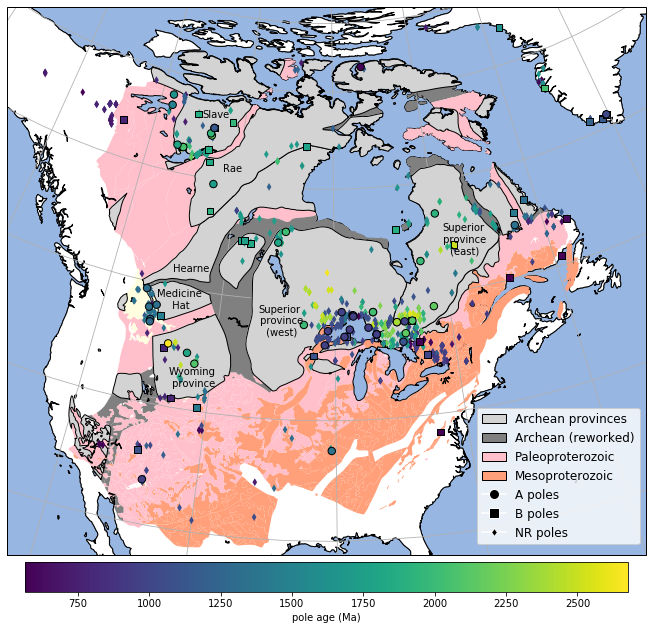

In [19]:
central_lat = duluth_lat
central_lon = duluth_lon
extent = [duluth_lon-30, duluth_lon+32, duluth_lat-22, duluth_lat+32]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

land = NaturalEarthFeature(category='physical', name='land',
                            scale='50m', facecolor=COLORS['land'])

ax.add_feature(land, facecolor='white',edgecolor='black')

shpfilename = './Data/Whitmeyer2007_GIS/Whitmeyer2007.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

    if unit.attributes['Unit'] == 'Basin' or \
       unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
            ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='lightyellow',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='pink',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                           facecolor='LightSalmon',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)


ax.gridlines()

ocean = NaturalEarthFeature(category='physical', name='ocean',
                            scale='50m', facecolor=COLORS['water'])
lakes = NaturalEarthFeature(category='physical', name='lakes',
                            scale='50m', facecolor=COLORS['water'])
ax.add_feature(lakes, edgecolor='black')
ax.add_feature(ocean, edgecolor='black',zorder=-1)

A_pole_locales = ax.scatter(poles_A.SLONG.tolist(), poles_A.SLAT.tolist(),
           c=poles_A['nominal age'].tolist(),
           edgecolors='black', s=55,
           transform=ccrs.Geodetic(),zorder=101)

B_pole_locales = ax.scatter(poles_B.SLONG.tolist(), poles_B.SLAT.tolist(),
           c=poles_B['nominal age'].tolist(),
           edgecolors='black', s=45, marker='s',
           transform=ccrs.Geodetic(),zorder=100)

NR_pole_locales = ax.scatter(paleomagia_poles.SLON.tolist(), paleomagia_poles.SLAT.tolist(),
           c=paleomagia_poles.AGE.tolist(),
           edgecolors='none', s=30, marker='d',
           transform=ccrs.Geodetic(),zorder=99)

plt.text(-97, 47, 'Superior\n province\n (west)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-72, 53, 'Superior\n province\n (east)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-107,42, 'Wyoming\n province',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110.25,48.25, 'Medicine\n Hat',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-109.5,51.5, 'Hearne',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-106,61, 'Rae',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110,66, 'Slave',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)


legend_elements = [Patch(facecolor='lightgrey', edgecolor='k',
                         label='Archean provinces'),
                   Patch(facecolor='grey', edgecolor='k',
                         label='Archean (reworked)'),
                    Patch(facecolor='pink', edgecolor='k',
                         label='Paleoproterozoic'),
                    Patch(facecolor='LightSalmon', edgecolor='k',
                         label='Mesoproterozoic'),
                   Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0], marker='d', color='w', label='NR poles',
                          markerfacecolor='k', markersize=6)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.28), fancybox=True, fontsize = 12)


plt.colorbar(B_pole_locales,orientation='horizontal',pad=0.01,shrink=0.9,label='pole age (Ma)')
plt.savefig('./Figures/Fig1_map.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

## Split poles by craton
Prior to the amalgamation of the Archean cratons of Laurentia ca. 1.85 Ga, I will consider each of the cratons individually. These cratons are coded out in the *Terrane* field:
- Laurentia-Slave
- Laurentia-Wyoming
- Laurentia-Rae
- Laurentia-Greenland-Nain
- Laurentia-Superior(East)
- Laurentia-Superior(West)
- Laurentia-Superior

Additionally, there are blocks of Laurentia that have undergone subsequent rotations that need to be considered as distinct from the main Laurentia craton and rotated to the main craton in order to be used for tectonic reconstruction:
- Laurentia-Greenland (including Laurentia-Greenland-Nain)
- Laurentia-Scotland
- Laurentia-Svalbard

In [20]:
print(poles_A['Terrane'].unique())
print(poles_B['Terrane'].unique())

['Laurentia-Superior(East)' 'Laurentia-Superior(West)' 'Laurentia-Wyoming'
 'Laurentia-Rae' 'Laurentia-Slave' 'Laurentia' 'Laurentia-Greenland']
['Laurentia-Superior(East)' 'Laurentia-Superior'
 'Laurentia-Trans-Hudson orogen' 'Laurentia-Rae' 'Laurentia-Slave'
 'Laurentia' 'Laurentia-Greenland' 'Laurentia-Greenland-Nain'
 'Laurentia-Scotland' 'Laurentia-Svalbard']


In [21]:
Laur_poles_A = poles_A[poles_A['Terrane']=='Laurentia']
Laur_poles_A_plon = Laur_poles_A.PLONG.tolist()
Laur_poles_A_plat = Laur_poles_A.PLAT.tolist()
Laur_poles_A_age = Laur_poles_A['nominal age'].tolist()
Laur_poles_A_a95 = Laur_poles_A.A95.tolist()

Laur_poles_B = poles_B[poles_B['Terrane']=='Laurentia']
#Laur_poles_B = Laur_poles_B[Laur_poles_B['nominal age']>700]
Laur_poles_B_plon = Laur_poles_B.PLONG.tolist()
Laur_poles_B_plat = Laur_poles_B.PLAT.tolist()
Laur_poles_B_age = Laur_poles_B['nominal age'].tolist()
Laur_poles_B_a95 = Laur_poles_B.A95.tolist()

Laur_Slave_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Slave']
Laur_Slave_poles_A_plon = Laur_Slave_poles_A.PLONG.tolist()
Laur_Slave_poles_A_plat = Laur_Slave_poles_A.PLAT.tolist()
Laur_Slave_poles_A_age = Laur_Slave_poles_A['nominal age'].tolist()
Laur_Slave_poles_A_a95 = Laur_Slave_poles_A.A95.tolist()

Laur_Slave_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Slave']
Laur_Slave_poles_B_plon = Laur_Slave_poles_B.PLONG.tolist()
Laur_Slave_poles_B_plat = Laur_Slave_poles_B.PLAT.tolist()
Laur_Slave_poles_B_age = Laur_Slave_poles_B['nominal age'].tolist()
Laur_Slave_poles_B_a95 = Laur_Slave_poles_B.A95.tolist()

Laur_Wyoming_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Wyoming']
Laur_Wyoming_poles_A_plon = Laur_Wyoming_poles_A.PLONG.tolist()
Laur_Wyoming_poles_A_plat = Laur_Wyoming_poles_A.PLAT.tolist()
Laur_Wyoming_poles_A_age = Laur_Wyoming_poles_A['nominal age'].tolist()
Laur_Wyoming_poles_A_a95 = Laur_Wyoming_poles_A.A95.tolist()

Laur_Wyoming_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Wyoming']
Laur_Wyoming_poles_B_plon = Laur_Wyoming_poles_B.PLONG.tolist()
Laur_Wyoming_poles_B_plat = Laur_Wyoming_poles_B.PLAT.tolist()
Laur_Wyoming_poles_B_age = Laur_Wyoming_poles_B['nominal age'].tolist()
Laur_Wyoming_poles_B_a95 = Laur_Wyoming_poles_B.A95.tolist()

Laur_Rae_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Rae']
Laur_Rae_poles_A_plon = Laur_Rae_poles_A.PLONG.tolist()
Laur_Rae_poles_A_plat = Laur_Rae_poles_A.PLAT.tolist()
Laur_Rae_poles_A_age = Laur_Rae_poles_A['nominal age'].tolist()
Laur_Rae_poles_A_a95 = Laur_Rae_poles_A.A95.tolist()

Laur_Rae_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Rae']
Laur_Rae_poles_B_plon = Laur_Rae_poles_B.PLONG.tolist()
Laur_Rae_poles_B_plat = Laur_Rae_poles_B.PLAT.tolist()
Laur_Rae_poles_B_age = Laur_Rae_poles_B['nominal age'].tolist()
Laur_Rae_poles_B_a95 = Laur_Rae_poles_B.A95.tolist()

Laur_Nain_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Greenland-Nain']
Laur_Nain_poles_B_plon = Laur_Nain_poles_B['Laurentia_plon'].tolist()
Laur_Nain_poles_B_plat = Laur_Nain_poles_B['Laurentia_plat'].tolist()
Laur_Nain_poles_B_age = Laur_Nain_poles_B['nominal age'].tolist()
Laur_Nain_poles_B_a95 = Laur_Nain_poles_B.A95.tolist()

Laur_Superior_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Superior']
Laur_Superior_poles_A_plon = Laur_Superior_poles_A.PLONG.tolist()
Laur_Superior_poles_A_plat = Laur_Superior_poles_A.PLAT.tolist()
Laur_Superior_poles_A_age = Laur_Superior_poles_A['nominal age'].tolist()
Laur_Superior_poles_A_a95 = Laur_Superior_poles_A.A95.tolist()

Laur_Superior_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Superior']
Laur_Superior_poles_B_plon = Laur_Superior_poles_B.PLONG.tolist()
Laur_Superior_poles_B_plat = Laur_Superior_poles_B.PLAT.tolist()
Laur_Superior_poles_B_age = Laur_Superior_poles_B['nominal age'].tolist()
Laur_Superior_poles_B_a95 = Laur_Superior_poles_B.A95.tolist()

Laur_SuperiorE_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Superior(East)']
Laur_SuperiorE_poles_A_plon = Laur_SuperiorE_poles_A.PLONG.tolist()
Laur_SuperiorE_poles_A_plat = Laur_SuperiorE_poles_A.PLAT.tolist()
Laur_SuperiorE_poles_A_age = Laur_SuperiorE_poles_A['nominal age'].tolist()
Laur_SuperiorE_poles_A_a95 = Laur_SuperiorE_poles_A.A95.tolist()

Laur_SuperiorE_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Superior(West)']
Laur_SuperiorE_poles_B_plon = Laur_SuperiorE_poles_B.PLONG.tolist()
Laur_SuperiorE_poles_B_plat = Laur_SuperiorE_poles_B.PLAT.tolist()
Laur_SuperiorE_poles_B_age = Laur_SuperiorE_poles_B['nominal age'].tolist()
Laur_SuperiorE_poles_B_a95 = Laur_SuperiorE_poles_B.A95.tolist()

Laur_SuperiorW_poles_A = poles_A[poles_A['Terrane']=='Laurentia-Superior(West)']
Laur_SuperiorW_poles_A_plon = Laur_SuperiorW_poles_A.PLONG.tolist()
Laur_SuperiorW_poles_A_plat = Laur_SuperiorW_poles_A.PLAT.tolist()
Laur_SuperiorW_poles_A_age = Laur_SuperiorW_poles_A['nominal age'].tolist()
Laur_SuperiorW_poles_A_a95 = Laur_SuperiorW_poles_A.A95.tolist()

Laur_SuperiorW_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Superior(East)']
Laur_SuperiorW_poles_B_plon = Laur_SuperiorW_poles_B.PLONG.tolist()
Laur_SuperiorW_poles_B_plat = Laur_SuperiorW_poles_B.PLAT.tolist()
Laur_SuperiorW_poles_B_age = Laur_SuperiorW_poles_B['nominal age'].tolist()
Laur_SuperiorW_poles_B_a95 = Laur_SuperiorW_poles_B.A95.tolist()

Laur_THO_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Trans-Hudson orogen']
Laur_THO_poles_B_plon = Laur_THO_poles_B.PLONG.tolist()
Laur_THO_poles_B_plat = Laur_THO_poles_B.PLAT.tolist()
Laur_THO_poles_B_age = Laur_THO_poles_B['nominal age'].tolist()
Laur_THO_poles_B_a95 = Laur_THO_poles_B.A95.tolist()

Laur_Scotland_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Scotland']
Laur_Scotland_poles_B_plon = Laur_Scotland_poles_B['Laurentia_plon'].tolist()
Laur_Scotland_poles_B_plat = Laur_Scotland_poles_B['Laurentia_plat'].tolist()
Laur_Scotland_poles_B_age = Laur_Scotland_poles_B['nominal age'].tolist()
Laur_Scotland_poles_B_a95 = Laur_Scotland_poles_B.A95.tolist()

Laur_Svalbard_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Svalbard']
Laur_Svalbard_poles_B_plon = Laur_Svalbard_poles_B['Laurentia_plon'].tolist()
Laur_Svalbard_poles_B_plat = Laur_Svalbard_poles_B['Laurentia_plat'].tolist()
Laur_Svalbard_poles_B_age = Laur_Svalbard_poles_B['nominal age'].tolist()
Laur_Svalbard_poles_B_a95 = Laur_Svalbard_poles_B.A95.tolist()

Laur_Greenland_poles_B = poles_B[poles_B['Terrane']=='Laurentia-Greenland']
Laur_Greenland_poles_B_plon = Laur_Greenland_poles_B['Laurentia_plon'].tolist()
Laur_Greenland_poles_B_plat = Laur_Greenland_poles_B['Laurentia_plat'].tolist()
Laur_Greenland_poles_B_age = Laur_Greenland_poles_B['nominal age'].tolist()
Laur_Greenland_poles_B_a95 = Laur_Greenland_poles_B.A95.tolist()

## Plot Laurentia poles post-Paleoproterozoic amalgamation

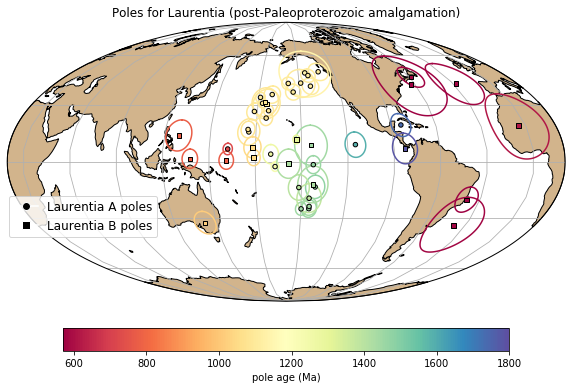

In [22]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,570,1800,marker='o',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,570,1800,marker='s',colormap='Spectral')
plt.title('Poles for Laurentia (post-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Laurentia A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Laurentia B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(0.28,0.4), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_poles.pdf')
plt.show()

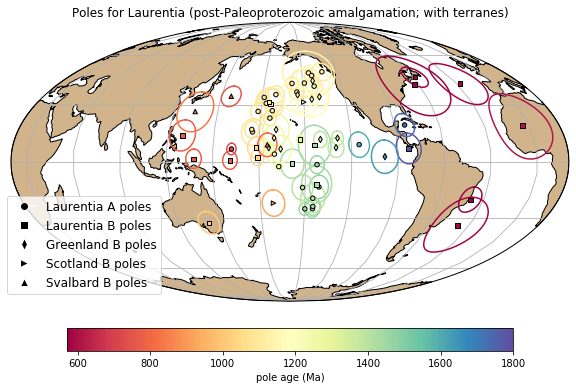

In [23]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_poles_A_plon,Laur_poles_A_plat,Laur_poles_A_a95,
                          Laur_poles_A_age,570,1800,marker='o',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_poles_B_plon,Laur_poles_B_plat,Laur_poles_B_a95,
                          Laur_poles_B_age,570,1800,marker='s',colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Greenland_poles_B_plon,Laur_Greenland_poles_B_plat,Laur_Greenland_poles_B_a95,
                          Laur_Greenland_poles_B_age,570,1800,marker='d',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Scotland_poles_B_plon,Laur_Scotland_poles_B_plat,Laur_Scotland_poles_B_a95,
                          Laur_Scotland_poles_B_age,570,1800,marker='>',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Svalbard_poles_B_plon,Laur_Svalbard_poles_B_plat,Laur_Svalbard_poles_B_a95,
                          Laur_Svalbard_poles_B_age,570,1800,marker='^',colorbar=False,colormap='Spectral')
plt.title('Poles for Laurentia (post-Paleoproterozoic amalgamation; with terranes)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Laurentia A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Laurentia B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='d', color='w', label='Greenland B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='>', color='w', label='Scotland B poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='^', color='w', label='Svalbard B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(0.28,0.4), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_poles_w_terranes.pdf')
plt.show()

## Paleolatitude through time

### Import Phanerozoic poles

To make a complete paleolatitude through time visualization, I will utilize poles from the Torsvik et al. 2012 compilation of Phanerozoic paleomagnetic poles.

In [24]:
Torsvik2012_poles = pd.read_csv('./data/Torsvik_Laurentia_Pole_Compilation.csv')

Following Swanson-Hysell and Macdonald (2017), we drop the remagnetized St. George  Group limestone and Tablehead Group limestone Mean poles

In [25]:
Torsvik2012_poles_filtered = Torsvik2012_poles[Torsvik2012_poles.Formation!='St. George  Group  limestone']
Torsvik2012_poles_filtered = Torsvik2012_poles_filtered[Torsvik2012_poles_filtered.Formation!='Tablehead Group  limestone Mean']

Laurentia and Baltica were drifting independently until the Caledonian Orogeny at ca. 430–420 Ma. At this point their pole path can be merged into a single "Laurussia'' path until the opening of that Atlantic (Torsvik et al., 2012). Here I will import the poles for Europe and then rotate them into Laurentia coordinates.

In [26]:
Torsvik2012_Europe_poles = pd.read_csv('./data/Torsvik_Europe_Pole_Compilation.csv')
Torsvik2012_Europe_poles.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,RLat_Laur,RLon_Laur
0,4,3.6,NaN,West Eifel volcanics,-80.6,267.5,-80.6,267.5,-80.6,-92.3,( 18.3/-47/ .1),0.5,"1513,T",NaN,NaN
1,4,4.4,NaN,East Eifel volcanics,-86.4,296.1,-86.4,296.1,-86.4,-63.1,( 18.3/-47/ .1),0.5,"1505,T",NaN,NaN
2,3,12.9,NaN,Volcanics NW Germany,-84.3,357.7,-84.3,357.7,-83.9,5.8,( 18/-26.7/ 1),8.0,"56,T",NaN,NaN
3,5,1.8,N,"Prado section, Teruel, Spain",-78.9,328.3,-78.9,328.3,-78.9,-25.8,( 17.9/-26.4/ 1.1),9.5,Abels et al. (2009),NaN,NaN
4,5,3.5,N,"Cascante, Spain",-77.4,314.2,-77.4,314.2,-77.7,-40.4,( 18.5/-26.3/ 1.2),10.0,Abdul Aziz et al. (2004),NaN,NaN


In [27]:
euler_pole = [78.6,161.9,-31.0] #Europe vs NA Euler pre-220 Ma from Torsvik et al. 2012

for pole in Torsvik2012_Europe_poles.index:
    if Torsvik2012_Europe_poles.Age[pole] > 220 and Torsvik2012_Europe_poles.Age[pole] < 420:
        pole_lat = Torsvik2012_Europe_poles.CLat[pole]
        pole_lon = Torsvik2012_Europe_poles.CLon[pole]
        rotated_lat, rotated_lon = pmag.pt_rot(euler_pole,[pole_lat,pole_lat],[pole_lon,pole_lon])
        Torsvik2012_Europe_poles.RLon_Laur[pole] = rotated_lon[0]
        Torsvik2012_Europe_poles.RLat_Laur[pole] = rotated_lat[0]
Torsvik2012_Europe_poles.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,RLat_Laur,RLon_Laur
0,4,3.6,NaN,West Eifel volcanics,-80.6,267.5,-80.6,267.5,-80.6,-92.3,( 18.3/-47/ .1),0.5,"1513,T",NaN,NaN
1,4,4.4,NaN,East Eifel volcanics,-86.4,296.1,-86.4,296.1,-86.4,-63.1,( 18.3/-47/ .1),0.5,"1505,T",NaN,NaN
2,3,12.9,NaN,Volcanics NW Germany,-84.3,357.7,-84.3,357.7,-83.9,5.8,( 18/-26.7/ 1),8.0,"56,T",NaN,NaN
3,5,1.8,N,"Prado section, Teruel, Spain",-78.9,328.3,-78.9,328.3,-78.9,-25.8,( 17.9/-26.4/ 1.1),9.5,Abels et al. (2009),NaN,NaN
4,5,3.5,N,"Cascante, Spain",-77.4,314.2,-77.4,314.2,-77.7,-40.4,( 18.5/-26.3/ 1.2),10.0,Abdul Aziz et al. (2004),NaN,NaN


In [28]:
Torsvik2012_Europe_poles_filtered = Torsvik2012_Europe_poles[Torsvik2012_Europe_poles.RLat_Laur.notnull()]
Torsvik2012_Europe_poles_filtered.head()

,Q,A95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,RLat_Laur,RLon_Laur
46,5,4.6,NaN,Sunnhordland dike,-50.0,305.0,-50.0,305.0,-56.9,45.8,( 46/ 3.9/ 58.2),221.0,"T, Walderhaug (1993)",-54.615530,279.672776
47,6,6.0,NaN,Gipskeuper sediments,-49.0,311.0,-49.0,311.0,-52.9,46.9,( 46/ 3.9/ 58.2),226.0,"3141,T",-53.165986,286.041616
48,5,2.9,N,"Taimyr Sills, Siberia",-47.1,301.6,-47.1,301.6,-57.8,39.2,( 46/ 3.9/ 58.2),228.0,Walderhaug et al. (2005),-51.965907,275.421347
49,6,3.0,NaN,"Heming limestone, France",-54.0,321.0,-54.0,321.0,-49.4,58.3,( 46/ 3.9/ 58.2),234.0,"2411,T",-57.250666,298.072784
50,6,12.0,NaN,"Musschelkalk carbonates, Poland",-53.0,303.0,-53.0,303.0,-59.1,50.4,( 46/ 3.9/ 58.2),234.0,"3253,T",-57.737687,278.064262


We can use the ipmag.lat_from_pole function to calculate the paleolatitude of a point of interest (in this case Duluth, Minnesota) implied by each paleomagnetic pole in the compilations.

In [29]:
Phanerozoic_plat_list = []
for pole in Torsvik2012_poles_filtered.index:
    plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,Torsvik2012_poles_filtered.CLon[pole],Torsvik2012_poles_filtered.CLat[pole])
    Phanerozoic_plat_list.append(-plat)
    
Phanerozoic_plat_list_Europe = []
for pole in Torsvik2012_Europe_poles_filtered.index:
    plat = ipmag.lat_from_pole(duluth_lon,duluth_lat,Torsvik2012_Europe_poles_filtered.RLon_Laur[pole],Torsvik2012_Europe_poles_filtered.RLat_Laur[pole])
    Phanerozoic_plat_list_Europe.append(-plat)

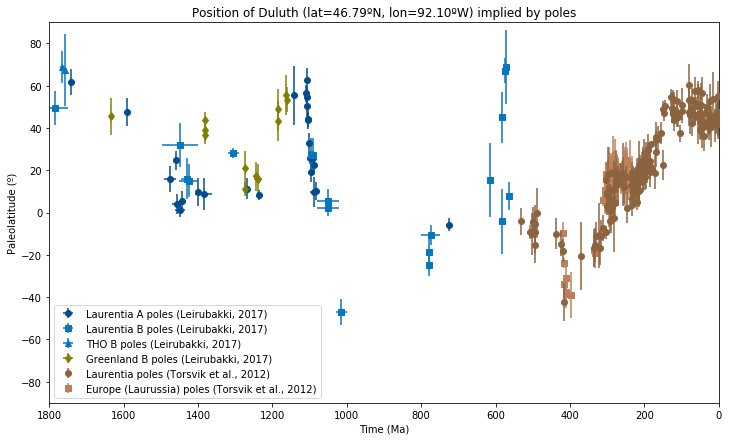

In [30]:
def plot_poles(title=None,paleomagia=False):
    plt.errorbar(Laur_poles_A['nominal age'], Laur_poles_A['Duluth_plat'],
                 yerr = Laur_poles_A['A95'], xerr = [Laur_poles_A['age_error_low'],Laur_poles_A['age_error_high']], fmt='o',
                 color='#034C8C',label='Laurentia A poles (Leirubakki, 2017)')
    plt.errorbar(Laur_poles_B['nominal age'], Laur_poles_B['Duluth_plat'],
                 yerr = Laur_poles_B['A95'], xerr = [Laur_poles_B['age_error_low'],Laur_poles_B['age_error_high']], fmt='s',
                 color='#0477BF',label='Laurentia B poles (Leirubakki, 2017)')
    plt.errorbar(Laur_THO_poles_B['nominal age'], Laur_THO_poles_B['Duluth_plat'],
                 yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']], fmt='^',
                 color='#0477BF',label='THO B poles (Leirubakki, 2017)')
    plt.errorbar(Laur_Greenland_poles_B['nominal age'], Laur_Greenland_poles_B['Duluth_plat'],
                 yerr = Laur_Greenland_poles_B['A95'], xerr = [Laur_Greenland_poles_B['age_error_low'],Laur_Greenland_poles_B['age_error_high']],
                 fmt='d', color='#808000',label='Greenland B poles (Leirubakki, 2017)')
    plt.errorbar(Torsvik2012_poles_filtered.Age, Phanerozoic_plat_list,
                 yerr = Torsvik2012_poles_filtered.A95, fmt='o',
                 color='#8C633F',label='Laurentia poles (Torsvik et al., 2012)',zorder=1000)
    plt.errorbar(Torsvik2012_Europe_poles_filtered.Age, Phanerozoic_plat_list_Europe,
                 yerr = Torsvik2012_Europe_poles_filtered.A95, fmt='s',color='#BF7F5A',
                 label='Europe (Laurussia) poles (Torsvik et al., 2012)')
    
    if paleomagia==True:
        plt.errorbar(paleomagia_Laurentia['AGE'], paleomagia_Laurentia['Duluth_plat'],
                     yerr = paleomagia_Laurentia['A95'], xerr = [paleomagia_Laurentia['age_error_low'],paleomagia_Laurentia['age_error_high']], fmt='o',
                     color='lightgrey',label='Laurentia poles (Paleomagia)',zorder=-1)
        
    plt.ylim(-90,90)
    plt.xlim(0,1800)
    plt.xlabel('Time (Ma)')
    plt.ylabel('Paleolatitude (º)')
    if title != None:
        plt.title(title)
    plt.gca().invert_xaxis()
    plt.legend(loc=3)
    
plt.figure(figsize=(12,7))
plot_poles(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles')
plt.show()

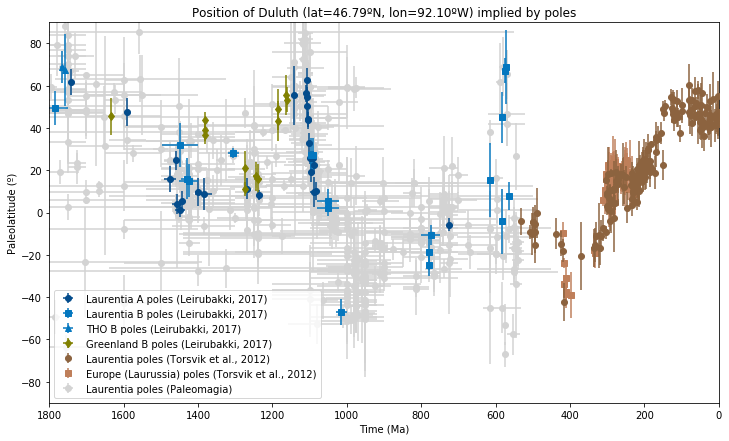

In [31]:
plt.figure(figsize=(12,7))
plot_poles(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles',paleomagia=True)
plt.show()

## Import the centroid motion paths for Laurentia resulting from different paleogeographic models

These motion paths are calculated in the Laurentia_motion_paths notebook for:
- Torsvik and Cocks, 2017
- Swanson-Hysell and Macdonald, 2017 modification of Torsvik and Cocks, 2017
- Merdith et al. 2017
- simple Laurentia model

In [32]:
Torsvik2017_duluth = pd.read_csv('./models/motion_paths/Torsvik_2017_duluth_reconstruct.csv',names=['orig_index','time','plat'],skiprows=1)
SHM_2017_duluth = pd.read_csv('./models/motion_paths/SH_2017_duluth_reconstruct.csv',names=['orig_index','time','plat'],skiprows=1)
W_2013_duluth = pd.read_csv('./models/motion_paths/W_2013_duluth_reconstruct.csv',names=['orig_index','time','plat'],skiprows=1)
SH_simple_duluth = pd.read_csv('./models/motion_paths/SH_prot_duluth_simple_reconstruct.csv',names=['orig_index','time','plat'],skiprows=1)
M_2017_duluth = pd.read_csv('./models/motion_paths/M_2017_duluth_reconstruct.csv',names=['orig_index','time','plat'],skiprows=1)

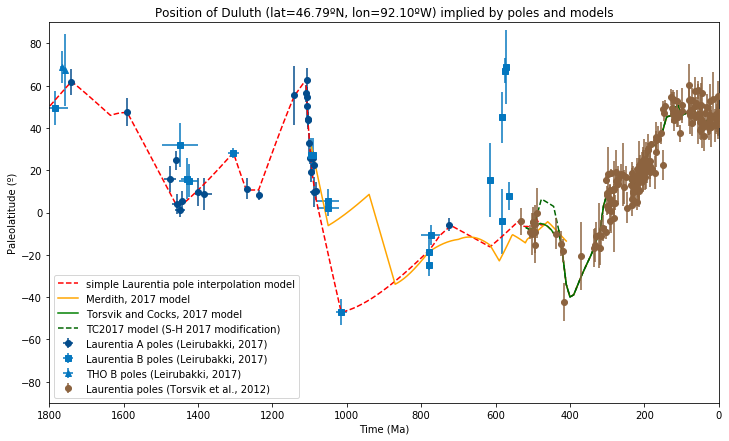

In [33]:
plt.figure(figsize=(12,7))
def plot_poles_models(title=None):
    
    plt.errorbar(Laur_poles_A['nominal age'], Laur_poles_A['Duluth_plat'],
                 yerr = Laur_poles_A['A95'], xerr = [Laur_poles_A['age_error_low'],Laur_poles_A['age_error_high']], fmt='o',
                 color='#034C8C',label='Laurentia A poles (Leirubakki, 2017)')
    plt.errorbar(Laur_poles_B['nominal age'], Laur_poles_B['Duluth_plat'],
                 yerr = Laur_poles_B['A95'], xerr = [Laur_poles_B['age_error_low'],Laur_poles_B['age_error_high']], fmt='s',
                 color='#0477BF',label='Laurentia B poles (Leirubakki, 2017)')
    plt.errorbar(Laur_THO_poles_B['nominal age'], Laur_THO_poles_B['Duluth_plat'],
                 yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']], fmt='^',
                 color='#0477BF',label='THO B poles (Leirubakki, 2017)')
    plt.errorbar(Torsvik2012_poles_filtered.Age, Phanerozoic_plat_list,
                 yerr = Torsvik2012_poles_filtered.A95, fmt='o',
                 color='#8C633F',label='Laurentia poles (Torsvik et al., 2012)',zorder=1000)

    plt.plot(SH_simple_duluth['time'],SH_simple_duluth['plat'],
             color='red',linestyle='--',label='simple Laurentia pole interpolation model')
    plt.plot(M_2017_duluth['time'],M_2017_duluth['plat'],
             color='orange',label='Merdith, 2017 model')
    plt.plot(Torsvik2017_duluth['time'],Torsvik2017_duluth['plat'],
             color='green',label='Torsvik and Cocks, 2017 model')
    plt.plot(SHM_2017_duluth['time'],SHM_2017_duluth['plat'],
             color='darkgreen',linestyle='--',label='TC2017 model (S-H 2017 modification)')

    plt.ylim(-90,90)
    plt.xlim(0,1800)
    plt.xlabel('Time (Ma)')
    plt.ylabel('Paleolatitude (º)')
    if title != None:
        plt.title(title)
    plt.gca().invert_xaxis()
    plt.legend(loc=3)
plot_poles_models(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles and models')
plt.show()

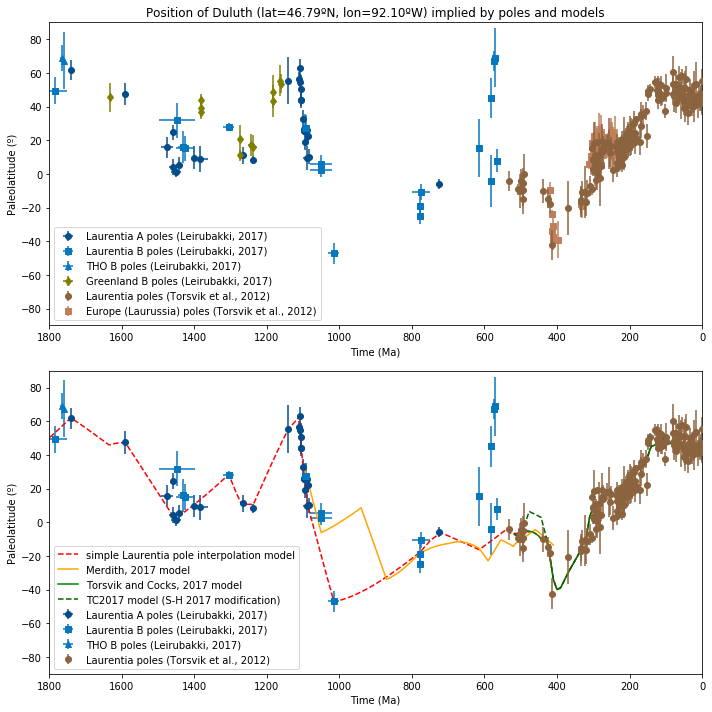

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plot_poles(title='Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles and models')
plt.subplot(2,1,2)
plot_poles_models()
plt.tight_layout()
plt.savefig('./Figures/Laurentia_paleolatitude.pdf')

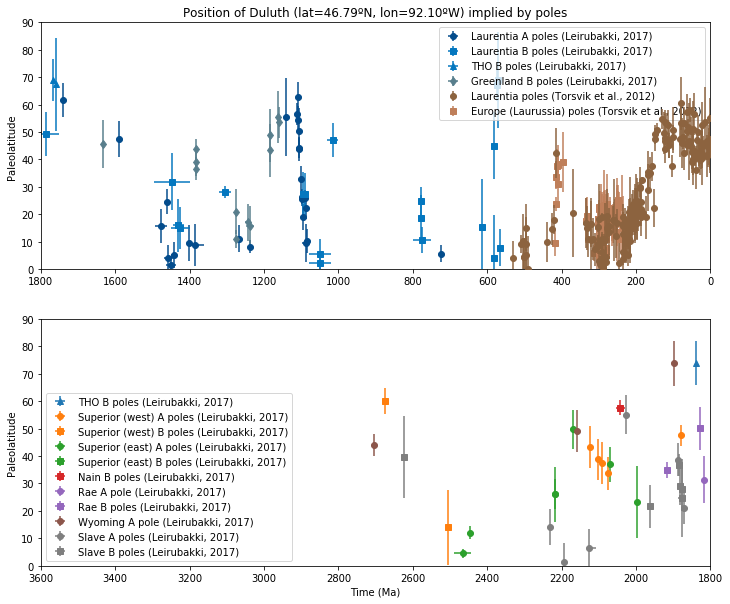

In [35]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)

plt.errorbar(Laur_poles_A['nominal age'], np.abs(Laur_poles_A['Duluth_plat']),
             yerr = Laur_poles_A['A95'], xerr = [Laur_poles_A['age_error_low'],Laur_poles_A['age_error_high']], fmt='o',
             color='#034C8C',label='Laurentia A poles (Leirubakki, 2017)')
plt.errorbar(Laur_poles_B['nominal age'], np.abs(Laur_poles_B['Duluth_plat']),
             yerr = Laur_poles_B['A95'], xerr = [Laur_poles_B['age_error_low'],Laur_poles_B['age_error_high']], fmt='s',
             color='#0477BF',label='Laurentia B poles (Leirubakki, 2017)')
plt.errorbar(Laur_THO_poles_B['nominal age'], np.abs(Laur_THO_poles_B['Duluth_plat']),
             yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']], fmt='^',
             color='#0477BF',label='THO B poles (Leirubakki, 2017)')
plt.errorbar(Laur_Greenland_poles_B['nominal age'], np.abs(Laur_Greenland_poles_B['Duluth_plat']),
             yerr = Laur_Greenland_poles_B['A95'], xerr = [Laur_Greenland_poles_B['age_error_low'],Laur_Greenland_poles_B['age_error_high']],
             fmt='d', color='#587E8C',label='Greenland B poles (Leirubakki, 2017)')
plt.errorbar(Torsvik2012_poles_filtered.Age, np.abs(Phanerozoic_plat_list),
             yerr = Torsvik2012_poles_filtered.A95, fmt='o',
             color='#8C633F',label='Laurentia poles (Torsvik et al., 2012)',zorder=1000)
plt.errorbar(Torsvik2012_Europe_poles_filtered.Age, np.abs(Phanerozoic_plat_list_Europe),
             yerr = Torsvik2012_Europe_poles_filtered.A95, fmt='s',color='#BF7F5A',
             label='Europe (Laurussia) poles (Torsvik et al., 2012)')

plt.ylim(0,90)
plt.xlim(1800,0)
plt.ylabel('Paleolatitude')
plt.title('Position of Duluth (lat=46.79ºN, lon=92.10ºW) implied by poles')
plt.legend(loc=1)

plt.subplot(2,1,2)

plt.errorbar(Laur_THO_poles_B['nominal age'], np.abs(Laur_THO_poles_B['Duluth_plat']),
             yerr = Laur_THO_poles_B['A95'], xerr = [Laur_THO_poles_B['age_error_low'],Laur_THO_poles_B['age_error_high']],
             fmt='^', color='C0', label='THO B poles (Leirubakki, 2017)')

plt.errorbar(Laur_SuperiorW_poles_A['nominal age'], np.abs(Laur_SuperiorW_poles_A['Duluth_plat']),
             yerr = Laur_SuperiorW_poles_A['A95'], xerr = [Laur_SuperiorW_poles_A['age_error_low'],Laur_SuperiorW_poles_A['age_error_high']],
             fmt='o', color='C1', label='Superior (west) A poles (Leirubakki, 2017)')
plt.errorbar(Laur_SuperiorW_poles_B['nominal age'], np.abs(Laur_SuperiorW_poles_B['Duluth_plat']),
             yerr = Laur_SuperiorW_poles_B['A95'], xerr = [Laur_SuperiorW_poles_B['age_error_low'],Laur_SuperiorW_poles_B['age_error_high']],
             fmt='s', color='C1', label='Superior (west) B poles (Leirubakki, 2017)')

plt.errorbar(Laur_SuperiorE_poles_A['nominal age'], np.abs(Laur_SuperiorE_poles_A['Duluth_plat']),
             yerr = Laur_SuperiorE_poles_A['A95'], xerr = [Laur_SuperiorE_poles_A['age_error_low'],Laur_SuperiorE_poles_A['age_error_high']],
             fmt='o', color='C2', label='Superior (east) A poles (Leirubakki, 2017)')
plt.errorbar(Laur_SuperiorE_poles_B['nominal age'], np.abs(Laur_SuperiorE_poles_B['Duluth_plat']),
             yerr = Laur_SuperiorE_poles_B['A95'], xerr = [Laur_SuperiorE_poles_B['age_error_low'],Laur_SuperiorE_poles_B['age_error_high']],
             fmt='s', color='C2', label='Superior (east) B poles (Leirubakki, 2017)')

plt.errorbar(Laur_Nain_poles_B['nominal age'], np.abs(Laur_Nain_poles_B['Duluth_plat']),
             yerr = Laur_Nain_poles_B['A95'], xerr = [Laur_Nain_poles_B['age_error_low'],Laur_Nain_poles_B['age_error_high']],
             fmt='s', color='C3', label='Nain B poles (Leirubakki, 2017)')

plt.errorbar(Laur_Rae_poles_A['nominal age'], np.abs(Laur_Rae_poles_A['Duluth_plat']),
             yerr = Laur_Rae_poles_A['A95'], xerr = [Laur_Rae_poles_A['age_error_low'],Laur_Rae_poles_A['age_error_high']],
             fmt='o', color='C4', label='Rae A pole (Leirubakki, 2017)')
plt.errorbar(Laur_Rae_poles_B['nominal age'], np.abs(Laur_Rae_poles_B['Duluth_plat']),
             yerr = Laur_Rae_poles_B['A95'], xerr = [Laur_Rae_poles_B['age_error_low'],Laur_Rae_poles_B['age_error_high']],
             fmt='s', color='C4', label='Rae B poles (Leirubakki, 2017)')

plt.errorbar(Laur_Wyoming_poles_A['nominal age'], np.abs(Laur_Wyoming_poles_A['Duluth_plat']),
             yerr = Laur_Wyoming_poles_A['A95'], xerr = [Laur_Wyoming_poles_A['age_error_low'],Laur_Wyoming_poles_A['age_error_high']],
             fmt='o', color='C5', label='Wyoming A pole (Leirubakki, 2017)')

plt.errorbar(Laur_Slave_poles_A['nominal age'], np.abs(Laur_Slave_poles_A['Duluth_plat']),
             yerr = Laur_Slave_poles_A['A95'], xerr = [Laur_Slave_poles_A['age_error_low'],Laur_Slave_poles_A['age_error_high']],
             fmt='o', color='C7', label='Slave A poles (Leirubakki, 2017)')
plt.errorbar(Laur_Slave_poles_B['nominal age'], np.abs(Laur_Slave_poles_B['Duluth_plat']),
             yerr = Laur_Slave_poles_B['A95'], xerr = [Laur_Slave_poles_B['age_error_low'],Laur_Slave_poles_B['age_error_high']],
             fmt='s', color='C7', label='Slave B poles (Leirubakki, 2017)')

plt.ylim(0,90)
plt.xlim(3600, 1800)
plt.xlabel('Time (Ma)')
plt.ylabel('Paleolatitude')
plt.legend(loc=3)
plt.show()

## Plot Laurentia poles pre-Paleoproterozoic amalgamation

LOOKS LIKE OPPOSITE POLARITY SHOULD BE ASSIGNED FOR ONE SLAVE POLE

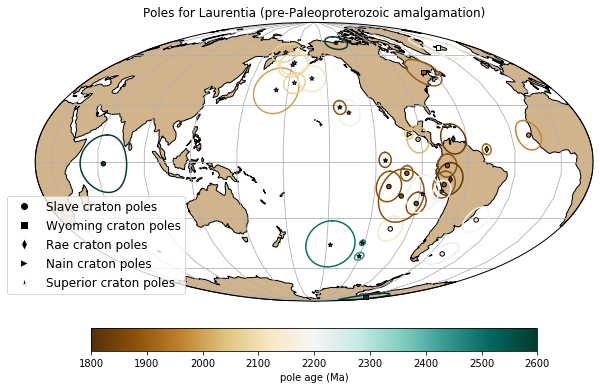

In [36]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
#Slave poles
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon,Laur_Slave_poles_A_plat,Laur_Slave_poles_A_a95,
                          Laur_Slave_poles_A_age,1800,2600,marker='o',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_B_plon,Laur_Slave_poles_B_plat,Laur_Slave_poles_B_a95,
                          Laur_Slave_poles_B_age,1800,2600,marker='o',colormap='BrBG')
#Wyoming poles
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_A_plon,
                          Laur_Wyoming_poles_A_plat,Laur_Wyoming_poles_A_a95,
                          Laur_Wyoming_poles_A_age,1800,2600,marker='s',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_B_plon,
                          Laur_Wyoming_poles_B_plat,Laur_Wyoming_poles_B_a95,
                          Laur_Wyoming_poles_B_age,1800,2600,marker='s',colorbar=False,colormap='BrBG')
#Rae poles
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_A_plon,Laur_Rae_poles_A_plat,Laur_Rae_poles_A_a95,
                          Laur_Rae_poles_A_age,1800,2600,marker='d',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_B_plon,Laur_Rae_poles_B_plat,Laur_Rae_poles_B_a95,
                          Laur_Rae_poles_B_age,1800,2600,marker='d',colorbar=False,colormap='BrBG')
#Nain poles
ipmag.plot_poles_colorbar(map_axis,Laur_Nain_poles_B_plon,Laur_Nain_poles_B_plat,Laur_Nain_poles_B_a95,
                          Laur_Nain_poles_B_age,1800,2600,marker='>',colorbar=False,colormap='BrBG')
#Superior poles CHANGING SYMBOLS NOW UPDATE KEY SUPERIOR ALL TRIANGLES
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_A_plon,Laur_Superior_poles_A_plat,Laur_Superior_poles_A_a95,
                          Laur_Superior_poles_A_age,1800,2600,marker='^',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_B_plon,Laur_Superior_poles_B_plat,Laur_Superior_poles_B_a95,
                          Laur_Superior_poles_B_age,1800,2600,marker='^',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_A_plon,Laur_SuperiorE_poles_A_plat,Laur_SuperiorE_poles_A_a95,
                          Laur_SuperiorE_poles_A_age,1800,2600,marker='*',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_B_plon,Laur_SuperiorE_poles_B_plat,Laur_SuperiorE_poles_B_a95,
                          Laur_SuperiorE_poles_B_age,1800,2600,marker='*',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_A_plon,Laur_SuperiorW_poles_A_plat,Laur_SuperiorW_poles_A_a95,
                          Laur_SuperiorW_poles_A_age,1800,2600,marker='*',colorbar=False,colormap='BrBG')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_B_plon,Laur_SuperiorW_poles_B_plat,Laur_SuperiorW_poles_B_a95,
                          Laur_SuperiorW_poles_B_age,1800,2600,marker='*',colorbar=False,colormap='BrBG')

plt.title('Poles for Laurentia (pre-Paleoproterozoic amalgamation)')

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Slave craton poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='Wyoming craton poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='d', color='w', label='Rae craton poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='>', color='w', label='Nain craton poles',
                          markerfacecolor='k', markersize=8),
                  Line2D([0], [0], marker='*', color='w', label='Superior craton poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(0.28,0.4), fancybox=True, fontsize = 12)
plt.savefig('./Figures/Laurentia_poles_preUnited.pdf')
plt.show()

## Plots for individual Archean cratons

### Evaluating differential motion of Slave and Superior

## Superior craton poles

### Molson dykes B+C2
The pole that is used is that calculated within Evans and Halls (2010). It is unclear whether the Molson dykes pole from the West Superior Craton should be corrected into East Superior Craton coordinates or not as the age of that rotation is not well-constrained. The dates associated with the poles come from Halls and Heaman (2000) in which a U-Pb zircon concordia intercept date of 1877 (+7/-4) was published and an another associated dike (without direct paleomagnetic data) has a date of 1884 ± 2 Ma (Heaman et al. 1986).

Evans and Halls (2010) propose that an Euler rotation of (51º N, 85º W, −14º CCW) be used reconstruct western Superior relative to eastern Superior and interpret that the rotation occured in the time interval of 2.07 to 1.87 Ga. They develop combined poles for the units that exist on both sides of the Kapuskasing Structural Zone. These combined poles are imported below along with all poles in both west and east coordinates.

In [76]:
Superior_poles = pd.read_excel('./data/Evans2010_Superior_poles.xlsx')
Superior_poles

,Pole,Age,Age_uncertainty,Plat_W_frame,Plon_W_frame,Plat_E_frame,Plon_E_frame,A95,1234567,Q,References,Leirubakki_rating
0,Otto Stock lamproph.,2680.0,≤2680 ± 1,-62.0,45.0,-69.0,47.0,5.0,111c101,6,Pullaiah and Irving (1975) and Buchan et\nal. ...,B
1,Ptarm.-Mistassinia,2505.0,2505 ± 2,-52.4,229.9,-45.3,213.0,13.8,1010101,4,"Fahrig et al. (1986), Buchan et al. (1998), re...",B
2,Matachewan R,2459.5,2473–2446,-48.1,257.4,-44.1,238.3,1.6,111C101,6,See text; Evans and Halls (2010) (W + E),A
3,Matachewan N,2446.0,2446 ± 3,-55.6,261.5,-52.3,239.5,2.4,111C101,6,See text; Evans and Halls (2010) (W + E),A
4,Nipissing N1 (B),2217.0,2217 ± 4,-16.0,286.0,-17.0,272.0,10.0,111C111,7,Buchan et al. (2000) (E),A
5,Senneterre (B),2216.0,2216 + 8/-4,-12.9,297.3,-15.3,284.3,6.0,111C111,7,Buchan et al. (1993) (E),A
6,Biscotasing (N),2172.0,2172–2167,19.6,232.3,26.0,223.9,7.0,111C100,5,"Buchan et al. (1993) (E), Halls and Davis (200...",A
7,Marathon N,2123.5,2126–2121,45.4,198.2,54.1,188.9,7.7,1110100,4,Buchan et al. (1996) and Halls et al. (2008) (W),A
8,Marathon R,2103.5,2106–2101,55.1,182.2,63.8,168.9,7.5,111C100,5,Buchan et al. (1996) and Halls et al. (2008) (W),A
9,Cauchon Lake (R)a,2091.0,2091 ± 2,53.8,180.9,62.4,167.3,7.7,111C100,5,Halls and Heaman (2000); recalc. Evans and Hal...,A


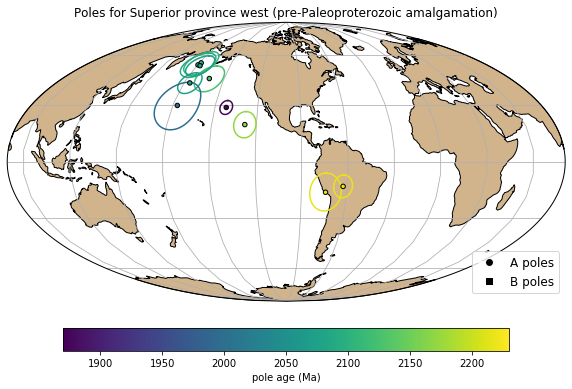

In [80]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Superior_poles.Plon_W_frame[4:].tolist(),
                          Superior_poles.Plat_W_frame[4:].tolist(),
                          Superior_poles.A95[4:].tolist(),
                          Superior_poles.Age[4:].tolist(),1870,2230,
                          marker='o',colormap='viridis')
plt.title('Poles for Superior province west (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Slave_poles.pdf')
plt.show()

Plot up all poles from Slave except for the ca. 2625 Ma Defeat suite pole.

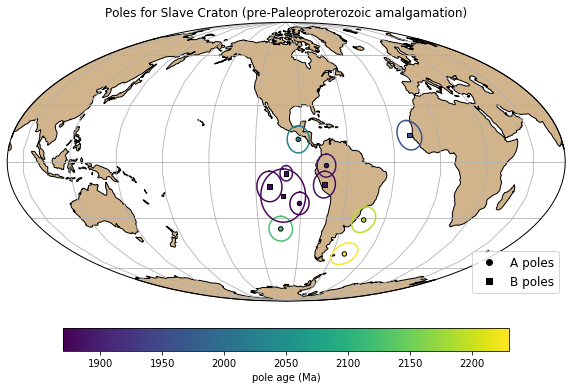

In [67]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon,Laur_Slave_poles_A_plat,Laur_Slave_poles_A_a95,
                          Laur_Slave_poles_A_age,1870,2230,marker='o',colorbar=False,colormap='viridis')
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_B_plon[1:],Laur_Slave_poles_B_plat[1:],Laur_Slave_poles_B_a95[1:],
                          Laur_Slave_poles_B_age[1:],1870,2230,marker='s',colormap='viridis')
plt.title('Poles for Slave Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Slave_poles.pdf')
plt.show()

In [92]:
Laur_poles_A

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Laurentia_plon,Laurentia_plat,age_error_high,age_error_low,age,Duluth_plat
37,Laurentia,Cleaver Dykes,9139,NaN,"C+, C*+",0.0,67.500000,241.970001,17.0,102,136.500000,57.400002,57.400002,64.000000,4.5,19.400000,276.700012,6.1,6.1,6.100000,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,1740.5,1736,1745,"ok, GPMDB4.6",Cleaver Dykes,"Irving,E., Baker,J., M. Hamilton,M., Wynne,P.J.",2004,Precambrian Res.,129,251-270,Early Proterozoic geomagnetic field in western...,NaN,NaN,NaN,NaN,276.700012,19.400000,4.5,4.5,1741$^{+5}$$_{-5}$,61.668269
38,Laurentia,Western Channel Diabase,2669,NaN,"Co,C+ in Irving+04",0.0,66.400002,242.199997,35.0,130,356.000000,-50.000000,50.000000,35.000000,6.0,9.000000,245.000000,5.1,8.6,6.622688,100,2.0,1,1,1,1,1,0,1,1,0,1,5,A,1590.0,1587,1593,"ca.1590, GAC 07 Yellowknife",Western Channel Diabase,"Irving,E., Donaldson,J.A., Park,J.K.",1972,Canad.J.Earth Sci.,9,960-971,Paleomagnetism of the Western Channel Diabase ...,NaN,NaN,NaN,NaN,245.000000,9.000000,3.0,3.0,1590$^{+3}$$_{-3}$,47.465207
39,Laurentia,St.Francois Mountains Acidic Rocks,8932,NaN,"C*+,F+,G+",100.0,37.500000,269.500000,18.0,103,233.399994,36.900002,36.900002,27.000000,6.8,-13.200000,219.000000,4.7,8.0,6.131884,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,1476.0,1460,1492,"ok, GPMDB4.6",St.Francois Mountains Acidic Rocks,"Meert, J.G., Stuckey, W.",2002,Tectonics,21(2),"1007, doi:10.1029/2000TC001265",Revisiting the paleomagnetism of the 1.476 Ga ...,NaN,NaN,NaN,NaN,219.000000,-13.200000,16.0,16.0,1476$^{+16}$$_{-16}$,15.762719
40,Laurentia,Michikamau Intrusion Combined,2274,Combined Result,"C+,Ro",0.0,54.500000,296.000000,12.0,54,259.500000,11.000000,11.000000,43.000000,6.5,-1.500000,217.500000,3.3,6.6,4.666905,8,3.0,1,1,1,1,1,1,1,0,1,1,6,A,1460.0,1455,1465,"ok, GPMDB4.6",Michikamau Intrusion Combined,"Emslie,R.F., Irving,E., Park,J.K.",1976,Canad.J.Earth Sci.,13,1052-1057,Further paleomagnetic results from the Michika...,NaN,NaN,NaN,NaN,217.500000,-1.500000,5.0,5.0,1460$^{+5}$$_{-5}$,24.652582
41,Laurentia,Spokane Formation,9039,Primary,F+,100.0,48.200001,246.800003,8.0,231,206.300003,23.700001,23.700001,86.400002,6.0,-24.799999,215.500000,4.7,4.7,4.700000,0,4.0,1,1,1,1,1,1,1,1,0,1,6,A,1457.5,1445,1470,"pre-1454±9, slightly revised from GPMDB4.6",Spokane Formation,"Elston, D.P., Enkin, R.J., Baker, J., Kisilevs...",2002,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,NaN,NaN,NaN,215.500000,-24.799999,12.5,12.5,1458$^{+13}$$_{-13}$,4.208540
42,Laurentia,Snowslip Formation,9038,Primary,"F+,Ro",100.0,47.900002,245.900002,9.0,295,30.900000,-20.600000,20.600000,128.800003,4.6,-24.900000,210.199997,3.5,3.5,3.500000,MIXED,4.0,1,1,1,1,1,1,1,1,1,1,7,A,1449.5,1436,1463,"1436-1463, new lomagage",Snowslip Formation,"Elston, D.P., Enkin, R.J., Baker, J., Kisilevs...",2002,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,NaN,NaN,NaN,210.199997,-24.900000,13.5,13.5,1450$^{+14}$$_{-14}$,1.424813
44,Laurentia,Purcell Lava,9037,Primary,F+,100.0,49.400002,245.099998,10.0,166,26.600000,-25.700001,25.700001,64.000000,6.1,-23.600000,215.600006,4.8,4.8,4.800000,100,4.0,1,1,1,1,1,1,1,1,0,0,5,A,1443.0,1436,1450,"ok, GPMDB4.6",Purcell Lava,"Elston, D.P., Enkin, R.J., Baker, J., Kisilevs...",2002,Geol.Soc.Amer.Bull.,114,619-638,Tightening the Belt: Paleomagnetic-stratigraph...,NaN,NaN,NaN,NaN,215.600006,-23.600000,7.0,7.0,1443$^{+7}$$_{-7}$,5.265159
47,Laurentia,McNamara Formation,9031,NaN,"F+,Rc",100.0,46.900002,246.400002,10.0,195,37.200001,-36.599998,36.599998,42.799999,7.5,-13.500000,208.300003,6.7,6.7,6.700000,70,4.0,1,1,1,1,1,1,1,1,1,1,7,A,1401.0,1395,1407,"1401±6, GPMDB4.6",McNam

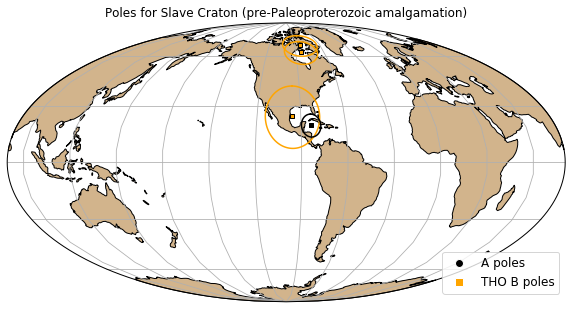

In [93]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles(map_axis,Laur_THO_poles_B_plon,
                 Laur_THO_poles_B_plat,
                 Laur_THO_poles_B_a95,
                 color='orange',marker='s')
ipmag.plot_pole(map_axis,Laur_poles_A_plon[0],
                 Laur_poles_A_plat[0],
                 Laur_poles_A_a95[0],
                 color='k',marker='s')
plt.title('Poles for Slave Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='THO B poles',
                          markerfacecolor='orange', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Slave_poles.pdf')
plt.show()

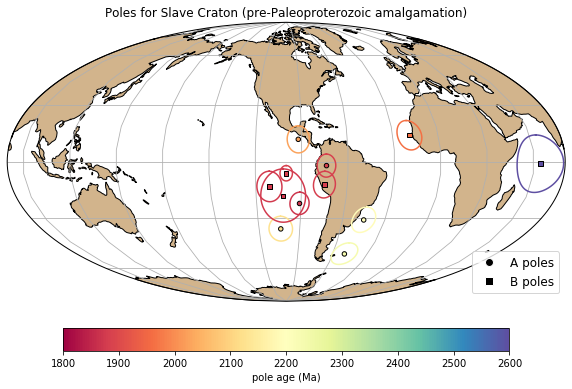

In [51]:
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon,Laur_Slave_poles_A_plat,Laur_Slave_poles_A_a95,
                          Laur_Slave_poles_A_age,1800,2600,marker='o',colorbar=False,colormap='Spectral')
ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_B_plon,Laur_Slave_poles_B_plat,Laur_Slave_poles_B_a95,
                          Laur_Slave_poles_B_age,1800,2600,marker='s',colormap='Spectral')
plt.title('Poles for Slave Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Slave_poles.pdf')
plt.show()

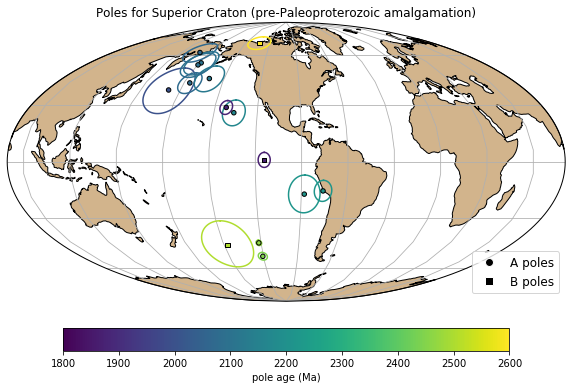

In [52]:
#NEED TO IMPROVE TO DEAL WITH SUPERIOR ROTATION
map_axis = ipmag.make_mollweide_map(central_longitude=260,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_A_plon,Laur_Superior_poles_A_plat,Laur_Superior_poles_A_a95,
                          Laur_Superior_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Superior_poles_B_plon,Laur_Superior_poles_B_plat,Laur_Superior_poles_B_a95,
                          Laur_Superior_poles_B_age,1800,2600,marker='s')
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_A_plon,Laur_SuperiorE_poles_A_plat,Laur_SuperiorE_poles_A_a95,
                          Laur_SuperiorE_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorE_poles_B_plon,Laur_SuperiorE_poles_B_plat,Laur_SuperiorE_poles_B_a95,
                          Laur_SuperiorE_poles_B_age,1800,2600,marker='s',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_A_plon,Laur_SuperiorW_poles_A_plat,Laur_SuperiorW_poles_A_a95,
                          Laur_SuperiorW_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_SuperiorW_poles_B_plon,Laur_SuperiorW_poles_B_plat,Laur_SuperiorW_poles_B_a95,
                          Laur_SuperiorW_poles_B_age,1800,2600,marker='s',colorbar=False)
plt.title('Poles for Superior Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Superior_poles.pdf')
plt.show()

In [ ]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_A_plon,
                          Laur_Wyoming_poles_A_plat,Laur_Wyoming_poles_A_a95,
                          Laur_Wyoming_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Wyoming_poles_B_plon,
                          Laur_Wyoming_poles_B_plat,Laur_Wyoming_poles_B_a95,
                          Laur_Wyoming_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Wyoming Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Wyoming_poles.pdf')
plt.show()

In [ ]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_A_plon,Laur_Rae_poles_A_plat,Laur_Rae_poles_A_a95,
                          Laur_Rae_poles_A_age,1800,2600,marker='o',colorbar=False)
ipmag.plot_poles_colorbar(map_axis,Laur_Rae_poles_B_plon,Laur_Rae_poles_B_plat,Laur_Rae_poles_B_a95,
                          Laur_Rae_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Rae Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Rae_poles.pdf')
plt.show()

In [ ]:
map_axis = ipmag.make_mollweide_map(central_longitude=200,figsize=(10,10))
ipmag.plot_poles_colorbar(map_axis,Laur_Nain_poles_B_plon,Laur_Nain_poles_B_plat,Laur_Nain_poles_B_a95,
                          Laur_Nain_poles_B_age,1800,2600,marker='s')
plt.title('Poles for Nain Craton (pre-Paleoproterozoic amalgamation)')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='A poles',
                          markerfacecolor='k', markersize=8),
                   Line2D([0], [0], marker='s', color='w', label='B poles',
                          markerfacecolor='k', markersize=8)]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.2), fancybox=True, fontsize = 12)
#plt.savefig('./Figures/Laurentia_Nain_poles.pdf')
plt.show()

In [41]:
Laur_Slave_poles_A

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Laurentia_plon,Laurentia_plat,age_error_high,age_error_low,age,Duluth_plat
25,Laurentia-Slave,Malley dykes,13555,NaN,C*+,0.0,64.2,249.8,9.0,45,138.3,-53.8,53.8,81.0,5.8,-50.8,310.0,6.7,6.7,6.700000,0,4.0,1,1,1,1,1,1,1,1,0,0,5,A,2231.0,2229,2233,"2231, U-Pb (b); authors",Malley dykes,"Buchan, K., LeCheminant, A.N., van Breemen, O.",2012,Can. J. Earth Sci.,49,435-454,"Malley diabase dykes of the Slave craton, Cana...",Corresponds with Mesozoic APWP,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2231$^{+2}$$_{-2}$,-14.116336
26,Laurentia-Slave,Dogrib dykes,9406,NaN,C+,0.0,62.5,245.5,14.0,134,302.0,33.0,33.0,34.0,7.0,-31.0,315.0,7.0,7.0,7.000000,0,4.0,1,1,1,1,1,1,1,1,0,1,6,A,2193.0,2191,2195,"2193, U-Pb (b); authors",Dogrib dykes,"Mitchell, R.N., Bleeker, W., Van Breemen, O., ...",2014,Am. J. Sci.,314,878-894,Plate tectonics before 2.0 Ga: Evidence from p...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2193$^{+2}$$_{-2}$,1.374138
27,Laurentia-Slave,Indin dykes,9484,NaN,C+,0.0,62.5,245.6,18.0,1000,300.0,-70.0,70.0,62.0,4.0,-36.0,256.0,7.0,7.0,7.000000,33or67,4.0,1,1,1,1,1,1,1,1,1,1,7,A,2126.0,2108,2129,"2126±3, U-Pb (b); authors and unpublished abst...",Indin dykes,"Buchan, Kenneth L. and Mitchell, Ross N. and B...",2016,Precambrian Research,275,151-175,Paleomagnetism of ca. 2.13–2.11 Ga Indin and c...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.0,2126$^{+3}$$_{-18}$,6.513152
28,Laurentia-Slave,Lac de Gras dykes,100035,NaN,"C*+,C+",0.0,64.4,249.6,10.0,54,338.2,-55.3,55.3,68.0,5.9,11.8,267.9,6.0,8.4,7.099296,0or100,4.0,1,1,1,1,1,1,1,1,0,1,6,A,2026.0,2021,2031,"2023±2, 2027±4 U-Pb baddeleyite, Buchan+09 CJES",Lac de Gras dykes,"Buchan,K.L., LeCheminant,A.N., van Breemen,O.",2009,Canad.J.Earth Sci.,46,361-379,Paleomagnetism and U-Pb geochronology of the L...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,2026$^{+5}$$_{-5}$,55.000000
30,Laurentia-Slave,Ghost Dike Swarm,new,NaN,C+,0.0,62.6,244.6,23.0,1000,350.0,-48.0,48.0,32.0,5.0,-2.0,286.0,6.0,6.0,6.000000,74,4.0,1,1,1,1,1,1,1,1,1,0,6,A,1887.0,1878,1892,"1887±5, 1884±6 U-Pb baddeleyite; authors and u...",Ghost Dike Swarm,"Buchan, Kenneth L. and Mitchell, Ross N. and B...",2016,Precambrian Research,275,151-175,Paleomagnetism of ca. 2.13–2.11 Ga Indin and c...,Corresponds with Devonian pole,NaN,NaN,NaN,NaN,NaN,5.0,9.0,1887$^{+5}$$_{-9}$,38.670135
35,Laurentia-Slave,MEAN Pearson A/Peninsular sill/Kilohigok basin...,new,NaN,C+,NaN,65.0,250.0,22.0,1000,162.4,3.5,3.5,1000.0,0.1,-22.0,269.0,6.0,6.0,6.000000,MIXED,2.0,1,1,1,1,1,0,1,1,1,1,6,A,1870.0,1866,1874,U-Pb on Kilohigok (Mara River) sill; Peninsula...,MEAN Pearson A/Peninsular sill/Kilohigok basin...,"Mitchell,R.N., Hoffman,P.F., Evans,D.A.D.",2010,Precambrian Res.,179,121-134,Coronation loop resurrected: Oscillatory appar...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1870$^{+4}$$_{-4}$,21.192812


In [45]:
Laur_Slave_poles_A_plon[1]

315.0

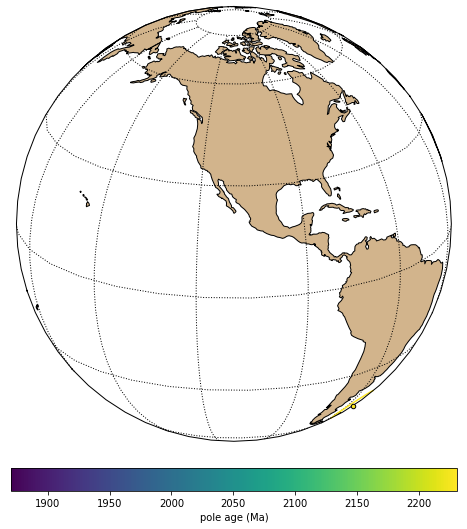

In [47]:
map_axis = ipmag.make_orthographic_map(central_longitude=250,central_latitude=20,figsize=(10,10))

ipmag.plot_poles_colorbar(map_axis,Laur_Slave_poles_A_plon[0:1],Laur_Slave_poles_A_plat[0:1],Laur_Slave_poles_A_a95[0:1],Laur_Slave_poles_A_age[0:1],vmin=1870,vmax=2231)

In [ ]:
Superior_poles.columns

In [ ]:
Superior_West_Paleolats = []
Superior_West_Paleolat_errors = []
Superior_West_Paleolatitudes
Superior_West_time = []

for n in Superior_poles.index:
    Duluth_paleolat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
                                          Superior_poles['Plon_W_frame'][n],
                                          Superior_poles['Plat_W_frame'][n])
    Superior_West_Paleolats.append(Duluth_paleolat)
    Superior_West_Paleolat_errors.append(Superior_poles['A95'][n])
    Superior_West_time.append(Superior_poles['Age'][n])
    
plt.errorbar(Superior_West_time,Superior_West_Paleolats,yerr=Superior_West_Paleolat_errors)

|pole| CRATON                   | ROCKNAME                                            | GPMDB-result#   |   SLAT |   SLONG |   PLAT |   PLONG |      A95 |   1 |   2 |   3 | 4   |   5 |   6 |   7 |   Q(7) |   nominal age |   min |   max | POLE AUTHORS                                | YEAR   | Nordic_Grade   |
|---:|:-------------------------|:----------------------------------------------------|:----------------|-------:|--------:|-------:|--------:|---------:|----:|----:|----:|:----|----:|----:|----:|-------:|--------------:|------:|------:|:--------------------------------------------|:-------|:---------------|
|  0 | Laurentia                | Franklin LIP grand mean                             | MEAN            |  73    |  275.4  |    6.7 |   162.1 |  3       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |         724   |   721 |   727 | Denyszyn et al.                             | 2009   | A              |
|  1 | Laurentia                | Michipicoten Island Fm                              | NEW             |  47.7  |  274.3  |   17   |   174.7 |  4.4     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        1084   |  1083 |  1085 | Fairchild et al.                            | 2017   | A              |
|  2 | Laurentia                | Lake Shore Traps                                    | 9506            |  47.6  |  271.9  |   23.1 |   186.4 |  4       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1087   |  1085 |  1089 | Kulakov et al.                              | 2013   | A              |
|  3 | Laurentia                | Central Arizona diabases -N                         | NEW             |  33.7  |  249.2  |   15.7 |   175.3 |  7.00999 |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1088   |  1077 |  1099 | Donadini et al.                             | 2011   | A              |
|  4 | Laurentia                | Schroeder Lutsen Basalts                            | NEW             |  47.5  |  269.1  |   27.1 |   187.8 |  3       |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        1090   |  1083 |  1092 | Fairchild et al.                            | 2017   | A              |
|  5 | Laurentia                | Portage Lake Volcanics                              | 9507            |  47    |  271.2  |   26.7 |   178   |  4.69574 |   1 |   1 |   1 | fG  |   1 |   0 |   1 |      6 |        1095   |  1092 |  1098 | Hnat et al.                                 | 2006   | A              |
|  6 | Laurentia                | North Shore lavas -N                                | NEW             |  46.3  |  268.7  |   34.5 |   181.3 |  2.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1097   |  1094 |  1100 | Tauxe & Kodama                              | 2009   | A              |
|  7 | Laurentia                | Uppermost Mamainse Point volcanics -N               | NEW             |  47.1  |  275.3  |   31.2 |   183.2 |  2.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1098   |  1095 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  8 | Laurentia                | Mamainse Point volcanics (lower N, upper R)         | 9512            |  47.1  |  275.3  |   36.1 |   189.7 |  4.9     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1100.5 |  1100 |  1101 | Swanson-Hysell et al.                       | 2014a  | A              |
|  9 | Laurentia                | Lower Mamainse Point volcanics -R2                  | 9511            |  47.1  |  275.3  |   37.5 |   205.2 |  4.5     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014a  | A              |
| 10 | Laurentia                | Upper Osler volcanics -R                            | 9514            |  48.7  |  272.4  |   42.5 |   201.6 |  3.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1105   |  1103 |  1107 | Swanson-Hysell et al.                       | 2014b  | A              |
| 11 | Laurentia                | Middle Osler volcanics -R                           | NEW             |  48.8  |  272.4  |   42.7 |   211.3 |  8.2     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1106.5 |  1103 |  1110 | Swanson-Hysell et al.                       | 2014b  | A              |
| 12 | Laurentia                | Lowermost Mamainse Point volcanics -R1              | 9510            |  47.1  |  275.3  |   49.5 |   227   |  5.3     |   1 |   1 |   1 | G   |   1 |   1 |   1 |      7 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014a  | A              |
| 13 | Laurentia                | Lower Osler volcanics -R                            | 9515            |  48.8  |  272.3  |   40.9 |   218.6 |  4.8     |   1 |   1 |   1 | 0   |   1 |   1 |   1 |      6 |        1108   |  1105 |  1111 | Swanson-Hysell et al.                       | 2014b  | A              |
| 14 | Laurentia                | MEAN Nipigon sills and lavas                        | MEAN            |  49.1  |  270.9  |   47.2 |   217.8 |  4       |   1 |   1 |   1 | c   |   1 |   0 |   1 |      6 |        1111   |  1107 |  1115 | LULEÅ WORKING GROUP                         | 2009   | A              |
| 15 | Laurentia                | Abitibi Dykes                                       | 7193            |  48    |  279    |   48.8 |   215.5 | 14.1     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1141   |  1139 |  1143 | Ernst & Buchan                              | 1993   | A              |
| 16 | Laurentia                | Sudbury Dykes Combined                              | 2175            |  46.3  |  278.6  |   -2.5 |   192.8 |  2.5     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1237   |  1232 |  1242 | Palmer et al. (age: Dudás et al. 1994)      | 1977   | A              |
| 17 | Laurentia                | Mackenzie dykes grand mean                          | MEAN            |  65    |  250    |    4   |   190   |  5       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        1267   |  1265 |  1269 | Buchan et al.                               | 2000   | A              |
| 18 | Laurentia                | Pilcher, Garnet Range and Libby Fms                 | 9030            |  46.7  |  246.4  |  -19.2 |   215.3 |  7.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1384.5 |  1362 |  1407 | Elston et al.                               | 2002   | A              |
| 19 | Laurentia                | McNamara Formation                                  | 9031            |  46.9  |  246.4  |  -13.5 |   208.3 |  6.7     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1401   |  1395 |  1407 | Elston et al.                               | 2002   | A              |
| 20 | Laurentia                | Purcell Lava                                        | 9037            |  49.4  |  245.1  |  -23.6 |   215.6 |  4.8     |   1 |   1 |   1 | f   |   1 |   0 |   0 |      5 |        1443   |  1436 |  1450 | Elston et al.                               | 2002   | A              |
| 21 | Laurentia                | Snowslip Formation                                  | 9038            |  47.9  |  245.9  |  -24.9 |   210.2 |  3.5     |   1 |   1 |   1 | f   |   1 |   1 |   1 |      7 |        1449.5 |  1436 |  1463 | Elston et al.                               | 2002   | A              |
| 22 | Laurentia                | Spokane Formation                                   | 9039            |  48.2  |  246.8  |  -24.8 |   215.5 |  4.7     |   1 |   1 |   1 | f   |   1 |   0 |   1 |      6 |        1457.5 |  1445 |  1470 | Elston et al.                               | 2002   | A              |
| 23 | Laurentia                | Michikamau Intrusion Combined                       | 2274            |  54.5  |  296    |   -1.5 |   217.5 |  4.6669  |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1460   |  1455 |  1465 | Emslie et al.                               | 1976   | A              |
| 24 | Laurentia                | St.Francois Mountains Acidic Rocks                  | 8932            |  37.5  |  269.5  |  -13.2 |   219   |  6.13188 |   1 |   1 |   1 | cfg |   1 |   0 |   1 |      6 |        1476   |  1460 |  1492 | Meert & Stuckey                             | 2002   | A              |
| 25 | Laurentia                | Western Channel Diabase                             | 2669            |  66.4  |  242.2  |    9   |   245   |  6.62269 |   1 |   1 |   0 | C   |   1 |   0 |   1 |      5 |        1590   |  1587 |  1593 | Irving et al. (age: Hamilton & Buchan 2010) | 1972   | A              |
| 26 | Laurentia                | Cleaver dykes                                       | 9139            |  67.5  |  241.97 |   19.4 |   276.7 |  6.1     |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        1740   |  1736 |  1745 | Irving et al.                               | 2004   | A              |
| 27 | Laurentia-Greenland      | South Qoroq Intrusion                               | 6610            |  61.15 |  314.6  |   41.8 |   215.9 | 13.1042  |   1 |   1 |   1 | C   |   0 |   0 |   1 |      5 |        1163   |  1161 |  1165 | Piper                                       | 1992   | A              |
| 28 | Laurentia-Rae            | Martin Fm                                           | 2659            |  59.6  |  251.4  |   -9   |   288   |  8.51176 |   1 |   1 |   0 | f   |   1 |   1 |   0 |      5 |        1818   |  1814 |  1822 | Evans & Bingham (age: Morelli et al. 2009)  | 1973   | A              |
| 29 | Laurentia-Slave          | MEAN Pearson A/Peninsular sill/Kilohigok basin sill | MEAN            |  65    |  250    |  -22   |   269   |  6       |   1 |   1 |   0 | C   |   1 |   1 |   1 |      6 |        1870   |  1866 |  1874 | Mitchell et al.                             | 2010   | A              |
| 30 | Laurentia-Slave          | Ghost dikes                                         | 9485            |  62.6  |  244.6  |    2   |   254   |  6       |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1887   |  1878 |  1892 | Buchan et al.                               | 2016   | A              |
| 31 | Laurentia-Slave          | Lac de Gras dykes                                   | 9404            |  64.4  |  249.6  |   11.8 |   267.9 |  7.0993  |   1 |   1 |   1 | Cc  |   1 |   0 |   1 |      6 |        2026   |  2021 |  2031 | Buchan et al.                               | 2009   | A              |
| 32 | Laurentia-Slave          | Indin dykes                                         | 9484            |  62.5  |  245.6  |   36   |   284   |  7       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2126   |  2108 |  2129 | Buchan et al.                               | 2016   | A              |
| 33 | Laurentia-Slave          | Dogrib dykes                                        | 9406            |  62.5  |  245.5  |  -31   |   315   |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2193   |  2191 |  2195 | Mitchell et al.                             | 2014   | A              |
| 34 | Laurentia-Slave          | Malley dykes                                        | 9405            |  64.2  |  249.8  |  -50.8 |   310   |  6.7     |   1 |   1 |   1 | c   |   1 |   0 |   0 |      5 |        2231   |  2229 |  2233 | Buchan et al.                               | 2012   | A              |
| 35 | Laurentia-Superior(East) | Minto dykes                                         | MEAN            |  57    |  285    |   38.7 |   171.5 | 13.1     |   1 |   1 |   1 | 0   |   1 |   1 |   0 |      5 |        1998   |  1996 |  2000 | Buchan et al. (recalc: Evans & Halls 2010)  | 1998   | A              |
| 36 | Laurentia-Superior(East) | Lac Esprit dykes                                    | MEAN            |  53    |  282    |   62   |   170.5 |  6.4     |   1 |   1 |   1 | 0   |   1 |   0 |   1 |      5 |        2069   |  2068 |  2070 | Buchan et al. (recalc: Evans & Halls 2010)  | 2007   | A              |
| 37 | Laurentia-Superior(East) | Biscotasing dykes                                   | MEAN            |  48    |  280    |   26   |   223.9 |  7       |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2169.5 |  2167 |  2172 | Evans & Halls                               | 2010   | A              |
| 38 | Laurentia-Superior(East) | Nipissing N1 component                              | MEAN            |  47    |  279    |  -17   |   272   | 10       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2217   |  2213 |  2221 | Buchan et al.                               | 2000   | A              |
| 39 | Laurentia-Superior(East) | Senneterre dykes                                    | MEAN            |  49    |  283    |  -15.3 |   284.3 |  6       |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2218   |  2212 |  2224 | Buchan et al.                               | 1993   | A              |
| 40 | Laurentia-Superior(East) | Matachewan dykes N                                  | MEAN            |  48    |  278    |  -52.3 |   239.5 |  2.4     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2446   |  2443 |  2449 | Evans & Halls                               | 2010   | A              |
| 41 | Laurentia-Superior(East) | Matachewan dykes R                                  | MEAN            |  48    |  278    |  -44.1 |   238.3 |  1.6     |   1 |   1 |   1 | C   |   1 |   0 |   1 |      6 |        2466   |  2443 |  2489 | Evans & Halls                               | 2010   | A              |
| 42 | Laurentia-Superior(West) | Molson dykes B+C2                                   | MEAN            |  55    |  262    |   28.9 |   218   |  3.8     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        1878.5 |  1873 |  1884 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 43 | Laurentia-Superior(West) | Fort Frances dykes                                  | MEAN            |  48    |  266    |   42.8 |   184.6 |  6.1     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2076.5 |  2072 |  2081 | Halls (recalc: Evans & Halls 2010)          | 1986   | A              |
| 44 | Laurentia-Superior(West) | Cauchon Lake dykes                                  | MEAN            |  56    |  263    |   53.8 |   180.9 |  7.7     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2091   |  2089 |  2093 | Halls & Heaman (recalc: Evans & Halls 2010) | 2000   | A              |
| 45 | Laurentia-Superior(West) | Marathon dykes R                                    | MEAN            |  49    |  275    |   55.1 |   182.2 |  7.5     |   1 |   1 |   1 | C   |   1 |   0 |   0 |      5 |        2103.5 |  2101 |  2106 | Halls et al.                                | 2008   | A              |
| 46 | Laurentia-Superior(West) | Marathon dykes N                                    | MEAN            |  49    |  275    |   45.4 |   198.2 |  7.7     |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2123.5 |  2121 |  2126 | Halls et al.                                | 2008   | A              |
| 47 | Laurentia-Wyoming        | Sourdough dikes                                     | 9539            |  44.7  | -108.3  |   49.2 |   292   |  8.1     |   1 |   1 |   1 | C   |   1 |   1 |   0 |      6 |        1899   |  1894 |  1904 | Kilian et al.                               | 2016   | A              |
| 48 | Laurentia-Wyoming        | Rabbit Creek, Powder River, and South Path dikes    | 9496            |  43.9  |  252.8  |   65.5 |   339.2 |  7.6     |   1 |   1 |   1 | C   |   1 |   1 |   1 |      7 |        2160   |  2152 |  2171 | Kilian et al.                               | 2015   | A              |
| 49 | Laurentia-Wyoming        | Stillwater Complex - C2                             | NEW             |  45.2  |  249.2  |  -83.6 |   335.8 |  4.04231 |   1 |   1 |   1 | 0   |   1 |   0 |   0 |      4 |        2705   |  2701 |  2709 | Selkin et al.                               | 2008   | A              |

## References cited

\cite{Bates1991a,Berman2007a,Corrigan2009a,Evans2010a,Hoffman1988a,Kilian2016a,Pehrsson2015a,Skipton2016a,St-Onge2009a,Weller2017a}


Thoughts from Lauri on March 16

> 1. This is a book with readers from other than the paleomagnetic community. Therefore, that we will get a smooth set of cratonic drifts we accept many other poles than just the NPW A&B-poles. We accept poles (yet with critical look of every pole) which have Voo Q  greater/equal than 3. Thus, include many other useful poles, not only A&B poles. You can use large symbols for A&B poles and small symbols for the rest of poles…
2. Your images is, I guess, for Laurentia. Remember that you should treat the NAM cratons also before consolidation of Laurentia as (most likely but we will see) independently drifting cratons: notably Wyoming, Slave, Superior, perhaps NE part of NAM including Greenland´s Archean, etc…Thus you should treat also the Archean-Paleoproterozoic data. Grenville will perhaps?? be its own case?
3. I like your pole plots with colored age ribbon below the image. This is one way to look the source data and the pole plots. Another looks you might include are the
- pole plots with polarity? (see below)
- pole plots with source block (a) before 1800 Ma, (b) after 1800 Ma (this you have started). It might be important to really demonstrate that indeed the younger than 1800 Ma poles agree when plotted from Superior, Wyoming, Slave, Hearne, Rae, THO, Arizona, Nairn, Greenland (rotated), etc but do not agree when plotted before 1800 Ma.This might even be a double image: left poles (with colors per craton) before 1800 Ma, (b) after 1800 Ma?
4. If you use the technique I have described previously in my Instructions, and what you use in Umkondo, you might be able to sort NAM data into two polarities, here called ”N” and ”R”. This is possible. Don´t worry YET if you end up NLaur and RLaur, which later turns out to be RBal and NBal in other continents: you nevertheless have signed N and R inherently and logically for Laurentia through out 3700-542 Ma. I fully understand that this may come difficult if there will be a sudden pole jumps of say 80-110 degrees but we accept that.  I plot the APWP´s and I pick up ”relative” polarity errors (=pole jumps of say 160-180 deg), I look that the drift of craton between two successive poles is less that 30 cm/yr in picking up most likely polarity changes rather than drift. This is not an easy game but overall you might be able to end to NAM magnetostratigraphy (or NAM polarity stratigraphy)…or at least for some cratons of NAM. Try!